In [1]:
from IPython.display import display
import sys
sys.path.append("..")


In [2]:
os.path.dirname(sys.argv[0])


NameError: name 'os' is not defined

In [3]:
import numpy as np
import logging
import pickle
import time
import importlib
import copy
import os


In [4]:
from matplotlib import gridspec
from matplotlib.patches import Ellipse
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)


In [20]:
# # from scripts import reclusterTree
# from StandardHC import linkageList
# from StandardHC import heatClustermap
# # from scripts import Tree1D
# from StandardHC import likelihood_invM as likelihood
# # from scripts import beamsearchTJS
# from StandardHC import N2Greedy_invM as N2Greedy
# # from scripts import beamSearch as bs
# from StandardHC import beamSearchOptimal_invM as BSO
from src.StandardHC import jetClustering
from src.StandardHC.utils import get_logger
from src.StandardHC import auxFunctions

from src.StandardHC import reclusterTree_invM as reclusterTree
from src.StandardHC import linkageList
from src.StandardHC import heatClustermap
from src.StandardHC import Tree1D_invM as Tree1D
from src.StandardHC import likelihood_invM as likelihood
from src.StandardHC import N2Greedy_invM as N2Greedy
from src.StandardHC import beamSearchOptimal_invM as BSO


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
logger = get_logger(level=logging.INFO)


In [22]:
"""Reload filles after changes"""
# importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
# importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
# importlib.reload(bs)
importlib.reload(BSO)
importlib.reload(jetClustering)
importlib.reload(auxFunctions)


<module 'src.StandardHC.auxFunctions' from '/Users/hanmingyang/Desktop/Research/StandardHC/examples/../src/StandardHC/auxFunctions.py'>

# CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

In [37]:
def load_jets(root_dir, filename):
    #     root_dir = "data/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".p", "rb") as fd:
        Truth = pickle.load(fd, encoding='latin-1')
    return Truth

def load_jets_pkl(root_dir, filename):
    #     root_dir = "data/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth = pickle.load(fd, encoding='latin-1')
    return Truth


In [24]:
import os
os.getcwd()


'/Users/hanmingyang/Desktop/Research/StandardHC/examples'

In [26]:
# rootDir = "invMassGinkgo/Truth/"
rootDir = os.getcwd()
# rootDir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/Trellis/Truth/"


### Sample case 1

In [29]:
# testset2 = load_jets(rootDir+"tree_1_truth_0")
testset2 = load_jets(rootDir, "2500.0m1.5dp_8_100_1")


In [12]:
# testset2


In [20]:
# testset2[14]["leaves"]


In [30]:
logger = get_logger(level=logging.INFO)


In [33]:
newjet = [N2Greedy.recluster(
    truth_jet,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    visualize=True,
) for truth_jet in testset2]


huh -149.57135330067325
huh -49.1839932129358
huh -137.85289981460798
huh -151.05895175161476
huh -172.16742621928074


In [34]:
# newjet
print(newjet)


[{'node_id': [0, 14, 25, 16, 24, 5, 2, 6, 3, 13, 20, 7, 26, 11, 27, 1, 22, 8, 10, 23, 18, 15, 4, 19, 9, 12, 17, 21], 'tree_ancestors': [array([54., 52., 48., 36.,  0.]), array([54., 52., 48., 36., 14.]), array([54., 52., 48., 43., 25.]), array([54., 52., 48., 43., 28., 16.]), array([54., 52., 48., 43., 28., 24.]), array([54., 52., 49., 39.,  5.]), array([54., 52., 49., 39., 32.,  2.]), array([54., 52., 49., 39., 32.,  6.]), array([54., 52., 49., 41.,  3.]), array([54., 52., 49., 41., 29., 13.]), array([54., 52., 49., 41., 29., 20.]), array([54., 53., 50., 44., 30.,  7.]), array([54., 53., 50., 44., 30., 26.]), array([54., 53., 50., 44., 34., 11.]), array([54., 53., 50., 44., 34., 27.]), array([54., 53., 50., 45., 31.,  1.]), array([54., 53., 50., 45., 31., 22.]), array([54., 53., 50., 45., 40.,  8.]), array([54., 53., 50., 45., 40., 35., 10.]), array([54., 53., 50., 45., 40., 35., 23.]), array([54., 53., 51., 46., 18.]), array([54., 53., 51., 46., 42., 15.]), array([54., 53., 51., 46.,

### Sample case 2

In [38]:
# testset = load_jets(rootDir,"tree_W_100_m2min_100.0_rate01_3.0_1.5")
testset = load_jets_pkl(rootDir, "tree_100_truth_3")


In [41]:
JetNleavesList = [(i, len(jet["leaves"]))
                  for i, jet in enumerate(testset)
                  ]


In [42]:
JetNleavesList[0]


(0, 9)

In [44]:
ijet = 0


In [45]:
input_jets = testset[JetNleavesList[ijet][0]:JetNleavesList[ijet][0]+1]
truth_jet = testset[JetNleavesList[ijet][0]:JetNleavesList[ijet][0]+1]


In [19]:
# truth_jet[0]


In [46]:
np.sum(truth_jet[0]["logLH"]), truth_jet[0]["tree"]


(-59.907742738723755,
 array([[ 1, 16],
        [ 2,  5],
        [ 3,  4],
        [-1, -1],
        [-1, -1],
        [ 6, 15],
        [ 7, 14],
        [ 8, 13],
        [ 9, 12],
        [10, 11],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]]))

In [21]:
truth_jet[0]["logLH"]


array([-14.30500317,  -6.48006821,  -5.99754858,  -2.71788406,
         0.        ,   0.        ,   0.        ,   0.        ,
        -7.16610336,  -6.42478848,  -3.01148939,   0.        ,
         0.        ,   0.        ,   0.        ])

In [47]:
test = likelihood.enrich_jet_logLH(truth_jet[0], dij=True)


huh tensor(-59.9077)


In [49]:
sum(truth_jet[0]["logLH"])


-59.907742738723755

In [32]:
def load_jets(filename):
    #     root_dir = "data/invMassGinkgo/"
    root_dir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth, BS, Greedy = pickle.load(fd, encoding='latin-1')
    return Truth, BS, Greedy


In [46]:
gt_jets, bs_jets, greedy_jets = load_jets("TruthBSmaxGreedy_9_leaves")


In [48]:
# gt_jets[0]


### Greedy

In [26]:
importlib.reload(N2Greedy)


<module 'scripts.N2Greedy_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/N2Greedy_invM.py'>

In [27]:
logger = get_logger(level=logging.WARNING)


In [14]:
# input_jets = [testset[12]]
input_jets = test


In [15]:
startTime = time.time()
greedyJets = [N2Greedy.recluster(
    truth_jet,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    visualize=True,
) for truth_jet in input_jets]

totTime = time.time() - startTime
greedyJetsLogLH = [sum(jet["logLH"]) for jet in greedyJets]


In [51]:
totTime/1000


0.014260313749313355

In [30]:
greedyJets[0]["logLH"]


array([-14.64535591, -10.5534557 ,  -2.59057697,   0.        ,
         0.        ,  -2.81799905,   0.        ,   0.        ,
       -12.3702062 ,  -3.55546178,   0.        ,   0.        ,
        -6.90810789,   0.        ,  -2.55615375,   0.        ,
         0.        ])

In [28]:
greedyJetsLogLH, greedyJets[0]["tree"],


([-44.75500298428634], array([[ 1,  6],
        [ 2,  3],
        [-1, -1],
        [ 4,  5],
        [-1, -1],
        [-1, -1],
        [ 7, 10],
        [ 8,  9],
        [-1, -1],
        [-1, -1],
        [11, 12],
        [-1, -1],
        [13, 14],
        [-1, -1],
        [-1, -1]]))

### Beam Search

In [10]:
def load_jets(in_filename):
    #
    # indir = "trellis/data/"
    indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/a_star_trellis/data/Ginkgo"
    # indir="/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/A_starTrellis/hierarchical-trellis/data/"
    # in_filename = os.path.join(indir, "test_" + str(NleavesMin) + "_jets.pkl")
    in_filename = os.path.join(indir, in_filename)
    with open(in_filename, "rb") as fd:
        gt_jets = pickle.load(fd, encoding='latin-1')
    return gt_jets


In [11]:
test = load_jets("test_9_jets.pkl")


In [12]:
len(test)


10

In [13]:
# truth_jets =input_jets[0:100]
truth_jets = test

BSO_jetsList = []

startTime = time.time()
a = time.time()

for i, truth_jet in enumerate(truth_jets):

    if i % 50 == 0:
        print(" # of reclustered jets = ", i,
              "; Partial time = ", time.time() - a)
        #                 print("PARTIAL TIME = ",time.time() -a)
        a = time.time()

    N = len(truth_jet["leaves"])
#     print("Beam size = ", min(3 * N, np.asarray(N * (N - 1) / 2).astype(int)))

    BSO_jetsList.append(BSO.recluster(
        truth_jet,
        beamSize=min(3*N, np.asarray(N * (N - 1) / 2).astype(int)),
        delta_min=truth_jet["pt_cut"],
        lam=float(truth_jet["Lambda"]),
        N_best=1,
        visualize=True,
    )[0]
    )

totTime = time.time() - startTime
# print("TOTAL TIME = ", time.time() - startTime)
# # print("BSO list = ", BSO_jetsList)
# BSO_jetsListLogLH = [sum(jet["logLH"]) for jet in BSO_jetsList]


 # of reclustered jets =  0 ; Partial time =  0.00013709068298339844


In [10]:
# BSO_jetsList[0]


In [54]:
totTime/100


0.10388176918029784

In [11]:
def save_jets(in_filename, outdir):
    #
    # indir = "trellis/data/"

    # indir="/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/A_starTrellis/hierarchical-trellis/data/"
    # in_filename = os.path.join(indir, "test_" + str(NleavesMin) + "_jets.pkl")
    in_filename = os.path.join(outdir, in_filename)
    with open(in_filename, "wb") as fd:
        pickle.dump((truth_jets, BSO_jetsList), fd)


In [32]:
outdir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/a_star_trellis/data/Ginkgo"
save_jets("test_45_jets_gt_BS.pkl")


SyntaxError: invalid syntax (<ipython-input-32-37c824fba0f9>, line 1)

In [235]:
BSO_jetsListLogLH, BSO_jetsList[0]["tree"]


([-44.75500298428634], array([[ 1,  6],
        [ 2,  3],
        [-1, -1],
        [ 4,  5],
        [-1, -1],
        [-1, -1],
        [ 7, 10],
        [ 8,  9],
        [-1, -1],
        [-1, -1],
        [11, 12],
        [-1, -1],
        [13, 14],
        [-1, -1],
        [-1, -1]]))

### Save truth,BS and Greedy

In [34]:
def saveTruthBSGD(in_filename, outdir):

    in_filename = os.path.join(outdir, in_filename)
    with open(in_filename, "wb") as fd:
        pickle.dump((truth_jets, BSO_jetsList, greedyJets), fd)


In [36]:
outdir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/HierarchicalTrellis-Ginkgo/src/data/"
saveTruthBSGD("TruthBSGD_9.pkl", outdir)


## ANALYSIS

In [7]:
def load_jets(filename):
    root_dir = "data/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth = pickle.load(fd, encoding='latin-1')
    return Truth


In [8]:
rootDir = "invMassGinkgo/Truth/"


In [9]:
invM5000 = {}
invM5000["W"] = load_jets(rootDir+"tree_W_5000_rate01_3.0_1.5")
invM5000["QCD"] = load_jets(rootDir+"tree_QCD_5000_rate01_1.5_1.5")


In [11]:
len(invM5000["QCD"])


5000

In [12]:
def pTetaPhi(jets):

    for jet in jets:
        p = np.asarray([np.linalg.norm(const[1::]) for const in jet["leaves"]])
        px = np.asarray([const[1] for const in jet["leaves"]])
        py = np.asarray([const[2] for const in jet["leaves"]])
        pz = np.asarray([const[3] for const in jet["leaves"]])

        pT = np.asarray([np.linalg.norm(const[1:3])
                        for const in jet["leaves"]])
        eta = 0.5 * (np.log(p + pz) - np.log(p - pz))
        phi = np.arctan2(py, px)

        pTj = np.sum(pT)
        eta_c = np.sum(pT*eta)/pTj
        phi_c = np.sum(pT*phi)/pTj

        jet["eta_c"] = eta_c
        jet["phi_c"] = phi_c
        jet["pT"] = pTj

        """ Shift to center at [0,0]"""
        eta = eta - eta_c
        phi = phi - phi_c

        jet["pTetaPhi"] = np.asarray([pT, eta, phi])

        """Principal axis"""
        tan_theta = 0.
        M11 = np.sum(jet["pTetaPhi"][0]*jet["pTetaPhi"][1]*jet["pTetaPhi"][2])
        M20 = np.sum(jet["pTetaPhi"][0]*jet["pTetaPhi"][1]*jet["pTetaPhi"][1])
        M02 = np.sum(jet["pTetaPhi"][0]*jet["pTetaPhi"][2]*jet["pTetaPhi"][2])
        denom = (M20-M02+np.sqrt(4*M11*M11+(M20-M02)*(M20-M02)))
        if(denom != 0):
            tan_theta = 2*M11/denom

#         print("tan(theta) = ", tan_theta)

        """Rotate"""
        rotpt = jet["pTetaPhi"][0]
        roteta = jet["pTetaPhi"][1]*np.cos(np.arctan(tan_theta)) + \
            jet["pTetaPhi"][2]*np.sin(np.arctan(tan_theta))
        rotphi = np.unwrap(-jet["pTetaPhi"][1]*np.sin(np.arctan(tan_theta)) +
                           jet["pTetaPhi"][2]*np.cos(np.arctan(tan_theta)))

        jet["rotpTetaPhi"] = np.asarray([rotpt, roteta, rotphi])

    return jets


In [32]:
def pixelate(DReta, DRphi, npoints, jets):
    etamin, etamax = -DReta, DReta  # Eta range for the image
    phimin, phimax = -DRphi, DRphi  # Phi range for the image

    allimages = []
    grid = np.zeros((npoints-1, npoints-1))

    for jet in jets:

        ietalist = ((jet["rotpTetaPhi"][1]+DReta) /
                    (2*DReta/float(npoints-1))).astype(int)
        iphilist = ((jet["rotpTetaPhi"][2]+DRphi) /
                    (2*DRphi/float(npoints-1))).astype(int)

        for ipos in range(len(jet["rotpTetaPhi"][0])):

            if(0 <= ietalist[ipos] < npoints-1 and 0 <= iphilist[ipos] < npoints-1):

                grid[ietalist[ipos], iphilist[ipos]
                     ] += [jet["rotpTetaPhi"][0][ipos]]

    return grid/np.sum(grid)


In [33]:
DReta = 0.6
DRphi = 0.6
Npoints = 50

images = {}
for key in invM5000.keys():
    pTetaPhiList = pTetaPhi(invM5000[key])
    images[key] = pixelate(DReta, DRphi, Npoints, pTetaPhiList)


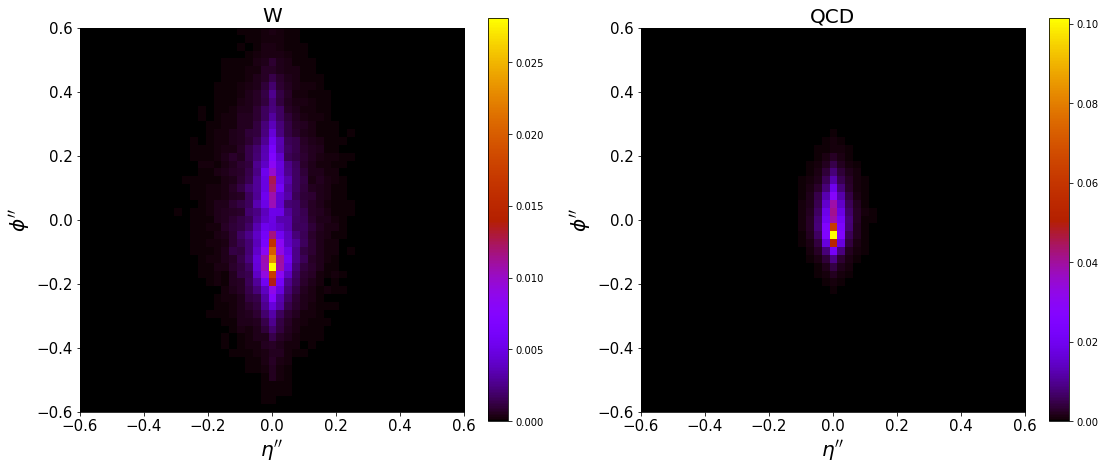

In [41]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(15, 6)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)

for i, key in enumerate(invM5000.keys()):
    cl1 = axes[i].imshow(images[key], 'gnuplot', aspect="equal",
                         extent=[-DReta, DReta, -DRphi, DRphi])  # ,
#     cl1 = axes[i].imshow(images[key], 'gnuplot', extent=[-DReta, DReta,-DRphi, DRphi],  norm=LogNorm(vmin=0.01, vmax=1))# , origin='upper', interpolation='none', vmin=0, vmax=0.5)
    axes[i].set_title(r""+str(key), fontsize=20)

#     cbar = fig2.colorbar(cl1)
    fig2.colorbar(cl1, ax=axes[i])

    axes[i].set_xlabel('$\eta^{\prime\prime}$', size=20)
    axes[i].set_ylabel('$\phi^{\prime\prime}$', size=20)

#         cl1 = axes.scatter(np.asarray(results["trellis_MLE"]), np.asarray(results["Z"]), c=np.asarray(results["Nleaves"]), marker="X", s=markersize)
# #     axes[i].scatter(truthLogLH, BSO_jetsListLogLH, color='green', marker="o", s=markersize, label="Beam Search")


#     cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
#     cb.set_label(label="Number of leaves", size=25)
#     cb.ax.tick_params(labelsize=15)

    cl1.axes.tick_params(labelsize=15)


plt.show()


In [73]:
1.2/0.08


15.0

In [38]:
# plt.imshow(pTetaPhiList[0]["rotpTetaPhi"][1],pTetaPhiList[0]["rotpTetaPhi"][2], pTetaPhiList[0]["rotpTetaPhi"][0])


In [42]:
jetdir = np.array([1, 1, 1])
jetP = 400.

jetvec = jetP * jetdir / np.linalg.norm(jetdir)
np.linalg.norm(jetvec[1:3])


326.59863237109045

In [53]:
jetLabels = ["Wjets", "QCDjets"]
truthDict = {}
GreedyDict = {}
BSODict = {}


In [51]:
Nstart = 0
Nend = 500
N_jets = 100


In [54]:
jetType = "QCDjets"
truthDict[jetType] = jetClustering.appendTruthJets(
    Nstart, Nend, N_jets, truth=True, jetType=jetType)
GreedyDict[jetType] = jetClustering.appendJets(
    Nstart, Nend, N_jets, BS=False, Greedy=True, jetType=jetType)
BSODict[jetType] = jetClustering.appendJets(
    Nstart, Nend, N_jets, BS=True, Greedy=False, jetType=jetType)


2023-09-07 10:37:27,219:INFO:: TOTAL TIME = 0.003529071807861328
2023-09-07 10:37:27,223:INFO:: TOTAL TIME = 0.0019228458404541016
2023-09-07 10:37:27,225:INFO:: TOTAL TIME = 0.0015749931335449219


In [9]:
jetType = "Wjets"
truthDict[jetType] = jetClustering.appendTruthJets(
    Nstart, Nend, N_jets, truth=True, jetType=jetType)
GreedyDict[jetType] = jetClustering.appendJets(
    Nstart, Nend, N_jets, BS=False, Greedy=True, jetType=jetType)
BSODict[jetType] = jetClustering.appendJets(
    Nstart, Nend, N_jets, BS=True, Greedy=False, jetType=jetType)


2020-01-24 20:33:09,383:INFO:: TOTAL TIME = 15.166218757629395
2020-01-24 20:34:25,052:INFO:: TOTAL TIME = 75.66793084144592
2020-01-24 20:35:46,681:INFO:: TOTAL TIME = 81.62772989273071


In [10]:
len(np.asarray(truthDict["Wjets"]["jetsList"]).flatten())


50000

In [11]:
# with open(dicsDir + "jetDicts"+str(N_jets) + "Mw.pkl", "rb") as fd:
#     truthDict, GreedyDict,BSODict = pickle.load(fd, encoding='latin-1')


In [11]:
computeDijAngles = False
if computeDijAngles:
    truthDict = auxFunctions.scanJets(
        truthDict, dijmetrics=False,  angles=True)
    GreedyDict = auxFunctions.scanJets(
        GreedyDict, dijmetrics=False,  angles=True)
    BSODict = auxFunctions.scanJets(BSODict, dijmetrics=False,  angles=True)


In [11]:
for jetType in jetLabels:
    truthDict[jetType]["Nconst"] = [len(jet["leaves"]) for jet in np.asarray(
        truthDict[jetType]["jetsList"]).flatten()]


KeyError: 'QCDjets'

KeyError: 'QCDjets'

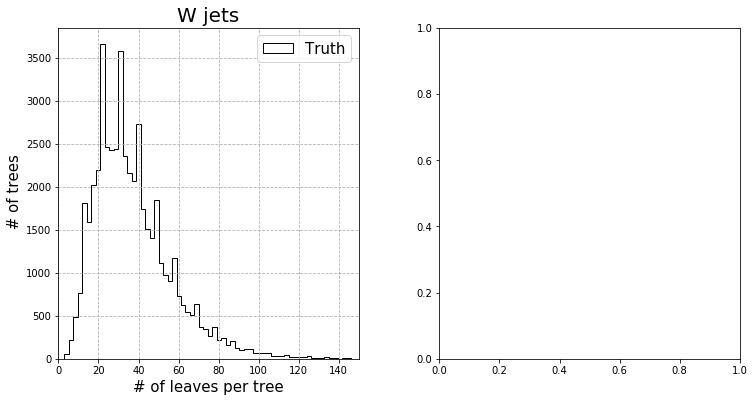

In [13]:

""" Number of constituents"""
auxFunctions.algoHist(truthDict, jetLabels=jetLabels, bins=100,  fixedJetP=False,
                      xLabel="# of leaves per tree", yLabel=" # of trees", variable="Nconst", minx=0, maxx=150)


Log LH values before cut on Delta root 

In [ ]:
len(truthDict["QCDjets"]["jetsList"])


In [17]:
for label in jetLabels:
    print(label)
    print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %
          (np.average(truthDict[label]["avgLogLH"]),  truthDict[label]["sigma"]))
    print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" % (np.average(
        GreedyDict[label]["avgLogLH"]),  GreedyDict[label]["sigma"]))
    print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %
          (np.average(BSODict[label]["avgLogLH"]),  BSODict[label]["sigma"]))
    print("---"*5)


Wjets
 Truth mean logLH =  -85.4 $\pm$ 1.1
 Greedy mean logLH = -127.9 $\pm$ 1.7
 Beam Search mean logLH = -95.5 $\pm$ 1.3
---------------
QCDjets
 Truth mean logLH =  -47.8 $\pm$ 0.9
 Greedy mean logLH = -inf $\pm$ nan
 Beam Search mean logLH = -52.0 $\pm$ 1.1
---------------


### Cluster trellis dataset

In [ ]:
len(np.asarray(truthDict["Wjets"]["jetsList"]).flatten())


In [12]:
treelis_Truth = np.asarray(truthDict["Wjets"]["jetsList"]).flatten()
treelis_BS = np.asarray(BSODict["Wjets"]["jetsList"]).flatten()
treelis_Greedy = np.asarray(GreedyDict["Wjets"]["jetsList"]).flatten()


In [13]:
len(treelis_Truth)


50000

In [14]:
len(treelis_Truth[0]["leaves"])


57

In [15]:
NleavesMin = 10
NleavesMax = 20


In [16]:
treelisTruth = [jet for jet in treelis_Truth if NleavesMin <=
                len(jet["leaves"]) <= NleavesMax][0:3000]
treellisBSO = [jet for jet in treelis_BS if NleavesMin <=
               jet["Nconst"] <= NleavesMax][0:3000]
treellisGreedy = [jet for jet in treelis_Greedy if NleavesMin <=
                  jet["Nconst"] <= NleavesMax][0:3000]


In [17]:
[idx for idx in range(len(treelisTruth)) if len(
    treelisTruth[idx]["leaves"]) < 11][0]


15

In [18]:
jetN = 15
len(treelisTruth[jetN]["leaves"])


10

In [19]:
for element in (treelisTruth[jetN], treellisBSO[jetN], treellisGreedy[jetN]):
    print(np.sum(element["logLH"]))


-22.881311535835266
-22.881277548562796
-22.881277548562796


In [20]:
print(len(treelisTruth))
print(len(treellisBSO))
print(len(treellisGreedy))


3000
3000
3000


In [21]:
Truth_trellis = copy.deepcopy(treelisTruth)
BSO_trellis = copy.deepcopy(treellisBSO)
Greedy_trellis = copy.deepcopy(treellisGreedy)


In [22]:
importlib.reload(likelihood)


<module 'scripts.likelihood' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/likelihood.py'>

In [23]:
Truth_trellis = [likelihood.enrich_jet_logLH(jet) for jet in Truth_trellis]
BSO_trellis = [likelihood.enrich_jet_logLH(jet) for jet in BSO_trellis]
Greedy_trellis = [likelihood.enrich_jet_logLH(jet) for jet in Greedy_trellis]


In [102]:
# a =likelihood.enrich_jet_logLH(Truth_trellis[jetN])


In [103]:
# a= likelihood.enrich_jet_logLH(BSO_trellis[jetN])


In [7]:
from scipy.special import factorial


In [11]:
def trees(n):
    nT = n*factorial(n, exact=True)/2**(n-1)
    return nT


In [26]:
for i in range(3, 11):
    print(trees(i))


4.5
12.0
37.5
135.0
551.25
2520.0
12757.5
70875.0


In [27]:
for i in range(3, 11):
    print(2**i)


8
16
32
64
128
256
512
1024


In [18]:
def upperNtrees(n):
    nuT = factorial(n, exact=True)**2 / (n * 2**(n-1))
    return nuT


In [23]:
upperNtrees(10)


2571912000.0

In [104]:
# a= likelihood.enrich_jet_logLH(Greedy_trellis[jetN])


In [24]:
for element in (Truth_trellis[jetN], BSO_trellis[jetN], Greedy_trellis[jetN]):
    print(np.sum(element["logLH"]))


-22.881277429353506
-22.881277429353506
-22.881277429353506


In [25]:
outdir = "../hierarchical-trellis/src/data/"
out_filename = os.path.join(outdir, "TruthBSGreedy_10_20Leaves.pkl")
with open(out_filename, "wb") as f:
    pickle.dump((Truth_trellis, BSO_trellis, Greedy_trellis), f, protocol=2)


In [77]:
160/50


3.2

### PLOTS

In [531]:
importlib.reload(auxFunctions)


<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [532]:
Width = 20
M_Hard = truthDict["Wjets"]["jetsList"][0][0]["M_Hard"]
M_Hard


80.0

In [533]:
# Njets = 100
# i=46
# inDir = "/scratch/sm4511/TreeAlgorithms/data/"
# # with open(inDir+"GreedyJets/Greedy_" + str(Njets) + "Mw_" + str(i) + ".pkl", "rb") as fd:
# #     jetsList, _ = pickle.load(fd, encoding='latin-1')
# with open(inDir+"BeamSearchJets/BSO_" + str(Njets) + "Mw_" + str(i) + ".pkl", "rb") as fd:
#     jetsList, _ = pickle.load(fd, encoding='latin-1')


In [534]:
truth_dic = {}
Greedy_dic = {}
BSO_dic = {}


In [535]:
for label in jetLabels:
    truth_dic[label], Greedy_dic[label], BSO_dic[label], NGreedyFail, NBSFail = auxFunctions.deltaRootCut(
        Nstart, Nend, truthDict[label], GreedyDict[label], BSODict[label], Width=Width, M_Hard=M_Hard)


In [536]:
NGreedyFail, NBSFail


(24, 0)

In [537]:
len(np.asarray(truth_dic["QCDjets"]["jetsList"]).flatten())


500

In [538]:
jetsperSet = 50
for label in jetLabels:
    truth_dic[label] = auxFunctions.jetsLogLH(
        Nstart, Nend, truth_dic[label], jetsperSet)
    Greedy_dic[label] = auxFunctions.jetsLogLH(
        Nstart, Nend, Greedy_dic[label], jetsperSet)
    BSO_dic[label] = auxFunctions.jetsLogLH(
        Nstart, Nend, BSO_dic[label], jetsperSet)


In [539]:
len(np.asarray(truth_dic["Wjets"]["jetsList"]).flatten())


8139

In [540]:
len(np.asarray(truth_dic["QCDjets"]["jetsList"]).flatten())


2545

In [541]:
for label in jetLabels:
    print(label)
    print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %
          (np.average(truth_dic[label]["avgLogLH"]),  truth_dic[label]["sigma"]))
    print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %
          (np.average(BSO_dic[label]["avgLogLH"]),  BSO_dic[label]["sigma"]))
    print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" % (np.average(
        Greedy_dic[label]["avgLogLH"]),  Greedy_dic[label]["sigma"]))
    print("---"*5)


Wjets
 Truth mean logLH =  -45.5 $\pm$ 3.1
 Beam Search mean logLH = -46.7 $\pm$ 3.2
 Greedy mean logLH = -60.9 $\pm$ 5.2
---------------
QCDjets
 Truth mean logLH =  -40.8 $\pm$ 2.9
 Beam Search mean logLH = -41.4 $\pm$ 3.3
 Greedy mean logLH = -53.5 $\pm$ 5.6
---------------


In [274]:
# print(" Truth mean logLH =  %0.1f $\pm$ %0.1f +- %0.1f"
#       %(np.average(truth_dic["avgLogLH"]),  truth_dic["sigma"],  truth_dic["statSigma"]))
# print(" Greedy mean logLH = %0.1f $\pm$ %0.1f +- %0.1f"
#       %(np.average(Greedy_dic["avgLogLH"]),  Greedy_dic["sigma"],  Greedy_dic["statSigma"]))
# print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f +- %0.1f"
#       %(np.average(BSO_dic["avgLogLH"]),  BSO_dic["sigma"],  BSO_dic["statSigma"]))


#### LOG LIKELIHOOD

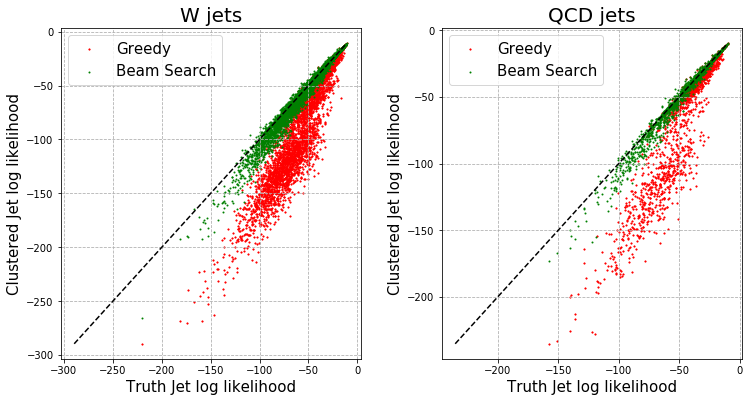

In [543]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(10, 5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

for i in range(len(jetLabels)):

    truthLogLH = truth_dic[jetLabels[i]]["jetsListLogLH"]
    greedy_jetsLogLH = Greedy_dic[jetLabels[i]]["jetsListLogLH"]
    BSO_jetsListLogLH = BSO_dic[jetLabels[i]]["jetsListLogLH"]

    x = np.linspace(min(greedy_jetsLogLH), max(truthLogLH), 1000)

    axes[i].scatter(truthLogLH, greedy_jetsLogLH, color="red",
                    marker="X", s=markersize, label="Greedy")
    axes[i].scatter(truthLogLH, BSO_jetsListLogLH, color='green',
                    marker="o", s=markersize, label="Beam Search")

    axes[i].plot(x, x, color="black", linestyle='--')
    axes[i].set_xlabel(r"Truth Jet log likelihood", fontsize=15)
    axes[i].set_ylabel(r"Clustered Jet log likelihood", fontsize=15)

    axes[i].grid(which='both', axis='both', linestyle='--')
    axes[i].set_title(r""+jetLabels[i][0:-4]+" " +
                      jetLabels[i][-4::], fontsize=20)

    axes[i].legend(loc='best', fontsize=15)

plt.show()


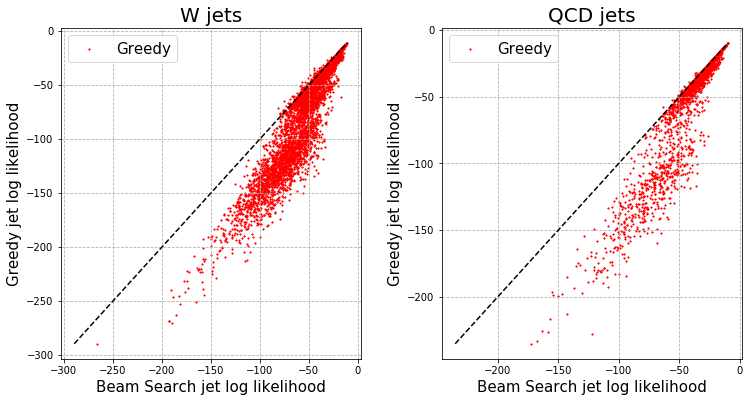

In [551]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(10, 5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

for i in range(len(jetLabels)):

    truthLogLH = truth_dic[jetLabels[i]]["jetsListLogLH"]
    greedy_jetsLogLH = Greedy_dic[jetLabels[i]]["jetsListLogLH"]
    BSO_jetsListLogLH = BSO_dic[jetLabels[i]]["jetsListLogLH"]

    x = np.linspace(min(greedy_jetsLogLH), max(truthLogLH), 1000)

    axes[i].scatter(BSO_jetsListLogLH, greedy_jetsLogLH,
                    color="red", marker="X", s=markersize, label="Greedy")

    axes[i].plot(x, x, color="black", linestyle='--')
    axes[i].set_xlabel(r"Beam Search jet log likelihood", fontsize=15)
    axes[i].set_ylabel(r"Greedy jet log likelihood", fontsize=15)

    axes[i].grid(which='both', axis='both', linestyle='--')
    axes[i].set_title(r""+jetLabels[i][0:-4]+" " +
                      jetLabels[i][-4::], fontsize=20)

    axes[i].legend(loc='best', fontsize=15)

plt.show()


### Delta root

In [552]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.deltaRoot(truth_dic[label])
    Greedy_dic[label] = auxFunctions.deltaRoot(Greedy_dic[label])
    BSO_dic[label] = auxFunctions.deltaRoot(BSO_dic[label])


In [553]:
importlib.reload(auxFunctions)


<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

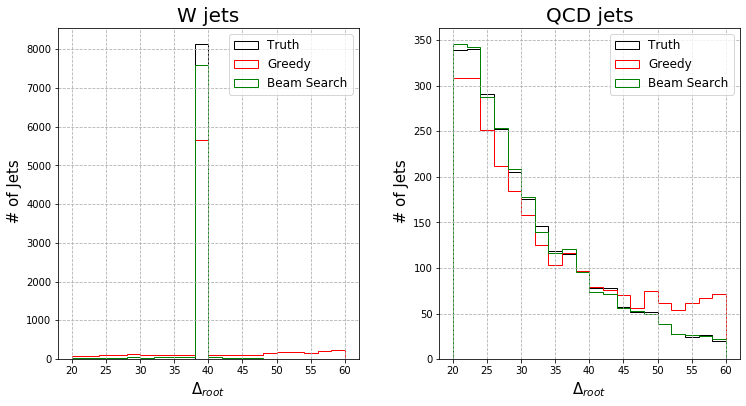

In [554]:
auxFunctions.variableHist(truth_dic, jetLabels=jetLabels, variable="deltaRoot",
                          dic1=truth_dic,
                          dic2=Greedy_dic,
                          dic3=BSO_dic,
                          name="$\Delta_{root}$", bins=20)


### Momentum of the 2 subjets

In [555]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.subjetPt(truth_dic[label])
    Greedy_dic[label] = auxFunctions.subjetPt(Greedy_dic[label])
    BSO_dic[label] = auxFunctions.subjetPt(BSO_dic[label])


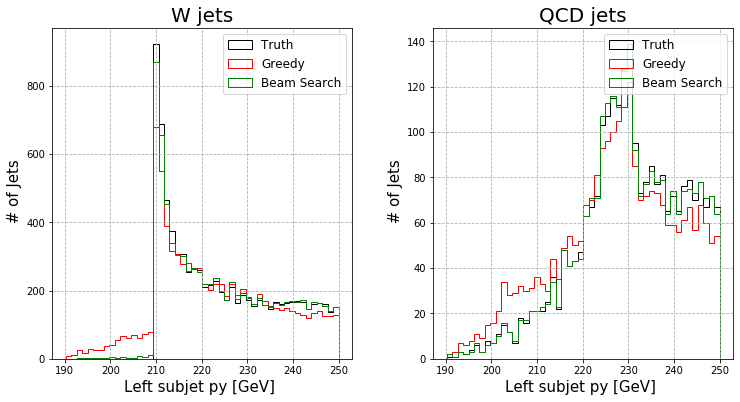

In [556]:
auxFunctions.variableHist(truth_dic, jetLabels=jetLabels, variable="SubjetPyMin",
                          dic1=truth_dic,
                          dic2=Greedy_dic,
                          dic3=BSO_dic,
                          name="Left subjet py [GeV]")


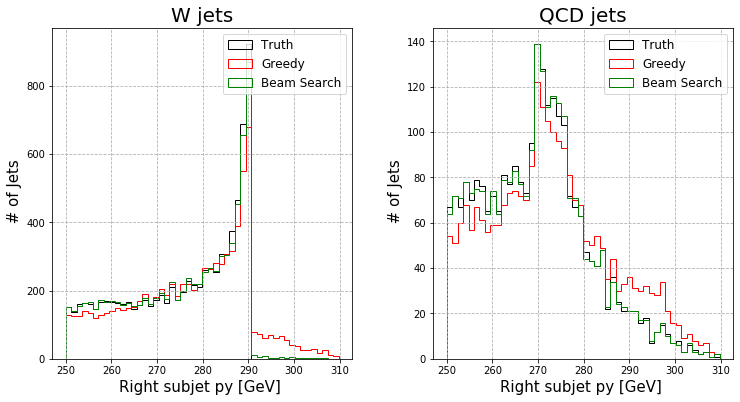

In [557]:
auxFunctions.variableHist(truth_dic, jetLabels=jetLabels, variable="SubjetPyMax",
                          dic1=truth_dic,
                          dic2=Greedy_dic,
                          dic3=BSO_dic,
                          name="Right subjet py [GeV]")


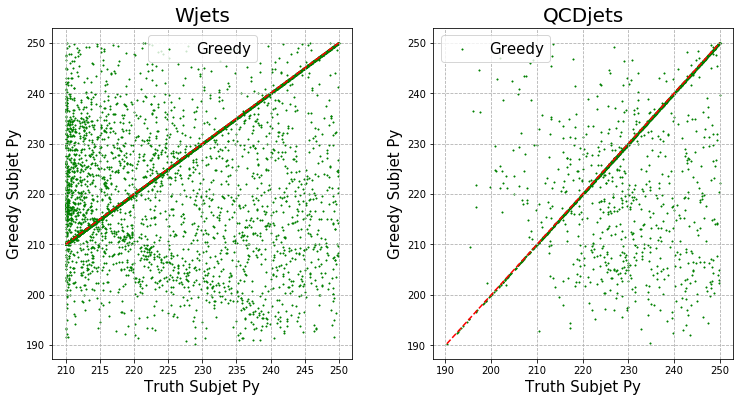

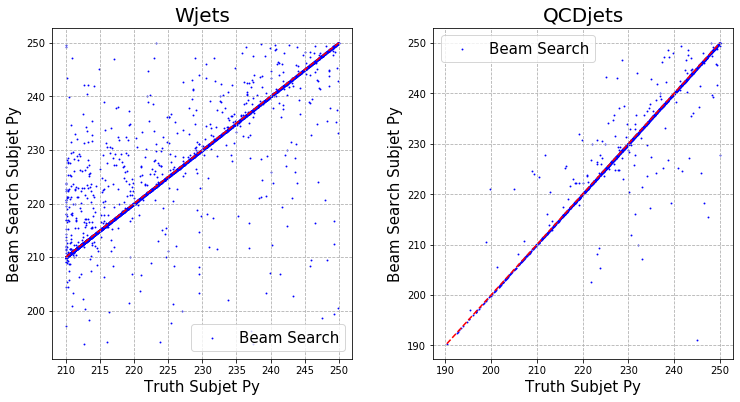

In [558]:
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,
                           dicString="SubjetPyMin", Greedy=True, jetLabels=jetLabels)
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,
                           dicString="SubjetPyMin",  BS=True, jetLabels=jetLabels)


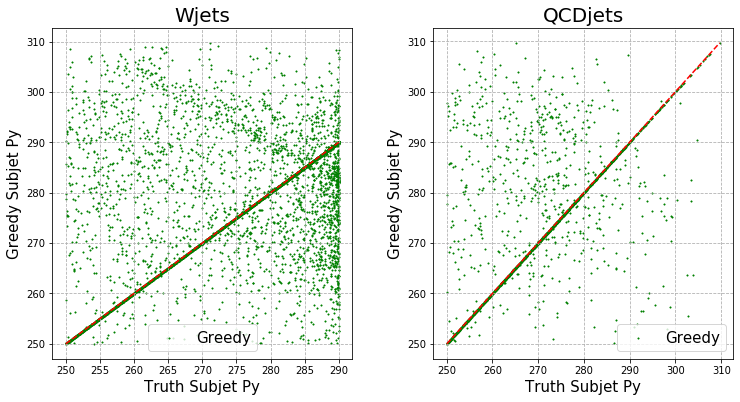

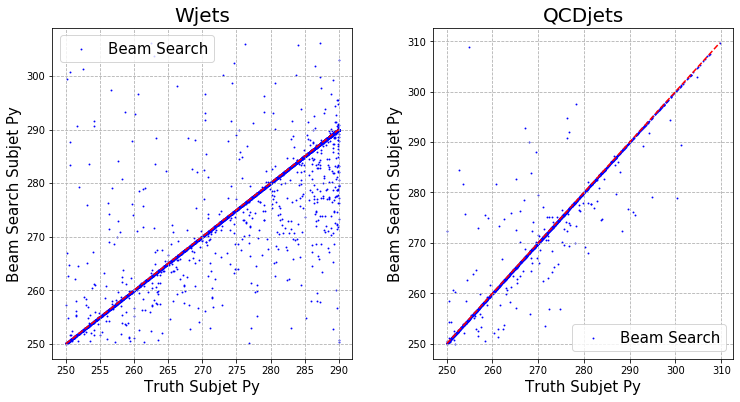

In [559]:
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,
                           dicString="SubjetPyMax", Greedy=True, jetLabels=jetLabels)
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,
                           dicString="SubjetPyMax",  BS=True, jetLabels=jetLabels)


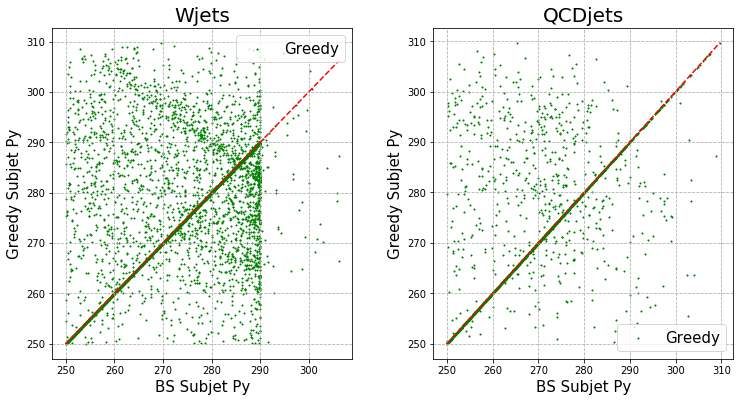

In [560]:
auxFunctions.PtscatterPlot(
    truth_dic, Greedy_dic, BSO_dic, dicString="SubjetPyMax", jetLabels=jetLabels)


### Phi angle for the (y,z) plane. Constituents angle, delta_root angle and delta_parent angle for all parents

In [605]:
importlib.reload(auxFunctions)


<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [562]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.subjetPhi(truth_dic[label])
    Greedy_dic[label] = auxFunctions.subjetPhi(Greedy_dic[label])
    BSO_dic[label] = auxFunctions.subjetPhi(BSO_dic[label])


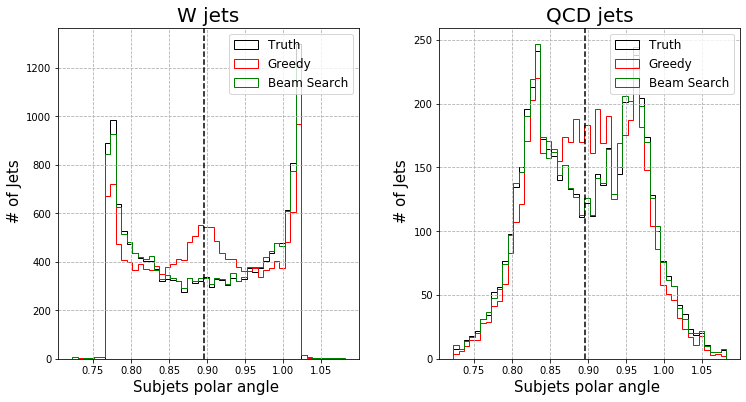

In [563]:
auxFunctions.variableHist(
    truth_dic, jetLabels=jetLabels, variable="SubjetPhi",
    dic1=truth_dic,
    dic2=Greedy_dic,
    dic3=BSO_dic,
    bins=50,
    name="Subjets polar angle",
    fixedJetP=True)


In [564]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.scanJets(truth_dic[label], angles=True)


In [565]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.scanAngles(truth_dic[label])
    Greedy_dic[label] = auxFunctions.scanAngles(Greedy_dic[label])
    BSO_dic[label] = auxFunctions.scanAngles(BSO_dic[label])


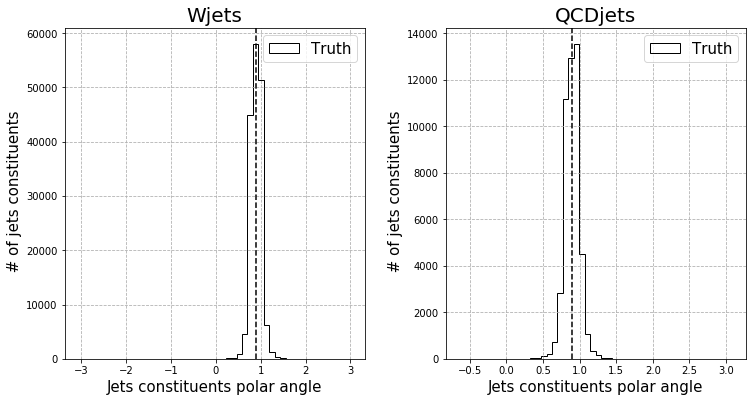

In [607]:

""" Subjets constituents angle. The origin is in the beam axiz (z direction)"""
auxFunctions.algoHist(truth_dic, jetLabels=jetLabels,  fixedJetP=True,
                      xLabel="Jets constituents polar angle", yLabel=" # of jets constituents", variable="JetsConstPhi")


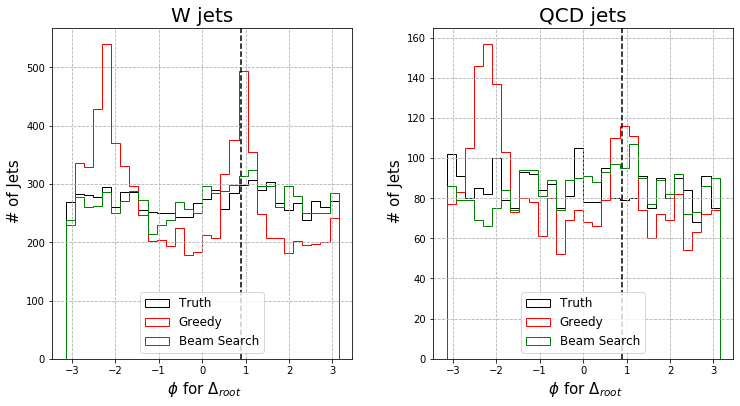

In [628]:
auxFunctions.variableHist(
    truth_dic, jetLabels=jetLabels, variable="SubjetPhiDelta",
    dic1=truth_dic,
    dic2=Greedy_dic,
    dic3=BSO_dic,
    bins=30,
    name=" $\phi$ for $\Delta_{root}$",
    fixedJetP=True,
    labelLoc="lower center")


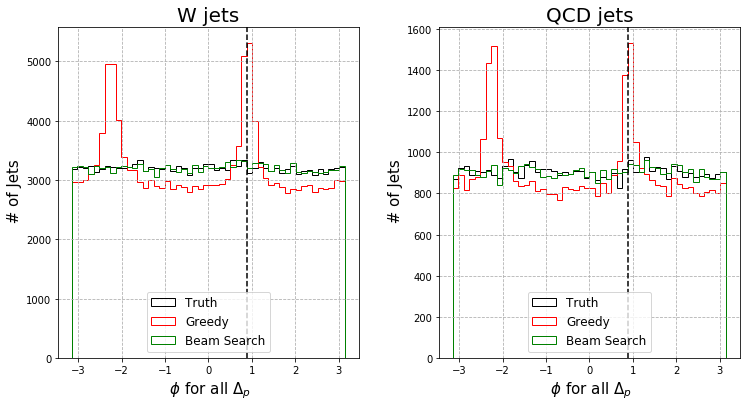

In [571]:
auxFunctions.variableHist(
    truth_dic, jetLabels=jetLabels, variable="JetsPhiDelta",
    dic1=truth_dic,
    dic2=Greedy_dic,
    dic3=BSO_dic,
    bins=50,
    name=" $\phi$ for all $\Delta_p$",
    fixedJetP=True,
    labelLoc="lower center")


In [569]:
Nconst = [len(jet["leaves"]) for jet in truth_dic["jetsList"]]


KeyError: 'jetsList'

In [ ]:
""" Find jet location in list for a specific number of leaves"""
for i, N in enumerate(Nconst):
    if N > 110:
        print("Jet #", i, "N const = ", N)


In [56]:
# k=1263
# auxFunctions.variableHist(
#     truth_dic,
#     variable1 =  truth_dic["jetsList"][k]["PhiDelta"],
#     variable2 = Greedy_dic["jetsList"][k]["PhiDelta"],
#     variable3 = BSO_dic["jetsList"][k]["PhiDelta"],
#              bins=10,
#              name = " Jets inner node Delta angle  ",
#             yaxisName = " # of jet inner nodes",
#              fixedJetP = True)


### $d_{ij}$ vs log Likelihood

In [573]:
importlib.reload(auxFunctions)


<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [606]:
#  truth_dic = auxFunctions.scanJets(truth_dic, dijmetrics=False,  angles=True)


In [607]:
#  Greedy_dic = auxFunctions.scanJets(Greedy_dic, dijmetrics=False,  angles=True)


In [608]:
#  BSO_dic = auxFunctions.scanJets(BSO_dic, dijmetrics=False,  angles=True)


In [574]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.scanDij(truth_dic[label])
    Greedy_dic[label] = auxFunctions.scanDij(Greedy_dic[label])
    BSO_dic[label] = auxFunctions.scanDij(BSO_dic[label])


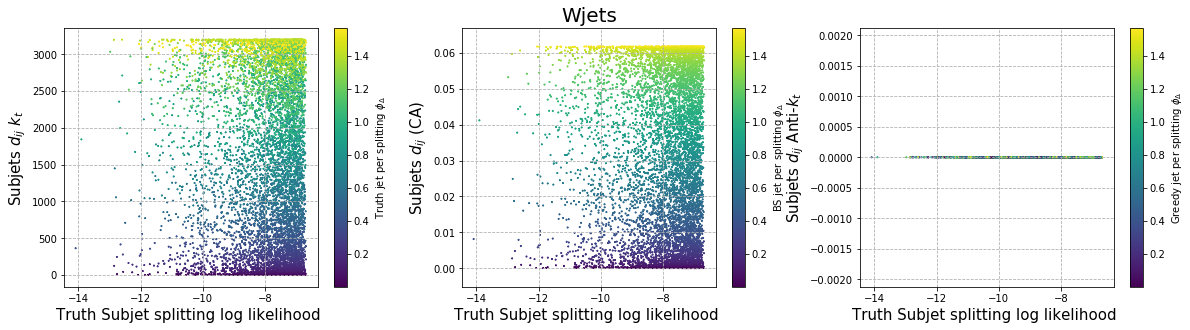

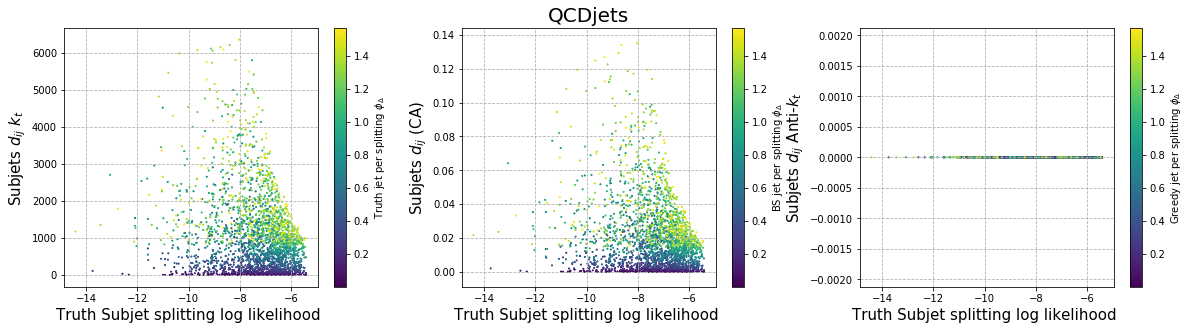

In [575]:
for i in range(len(jetLabels)):

    jetdijs = truth_dic[jetLabels[i]]["dijSubjets"]
    nameY = "Subjets $d_{ij}$"
    nameX = "Subjet splitting log likelihood"
    title = "Truth jets"
    # jetdijs2 = BSO_dic["dijs"]
    # jetdijs3 = Greedy_dic["dijs"]
    LabelJetdijs = "$k_t$"
    LabelJetdijs2 = "CA"
    LabelJetdijs3 = "Anti-$k_t$"

    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(16, 4)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    cl1 = ax1.scatter(jetdijs[0], jetdijs[3], c=truth_dic[jetLabels[i]]
                      ["SubjetPhiDeltaRel"], marker="X", s=markersize)
    cl2 = ax2.scatter(jetdijs[0], jetdijs[2], c=truth_dic[jetLabels[i]]
                      ["SubjetPhiDeltaRel"], marker="X", s=markersize)
    cl3 = ax3.scatter(jetdijs[0], jetdijs[1], c=truth_dic[jetLabels[i]]
                      ["SubjetPhiDeltaRel"], marker="X", s=markersize)

    # ax1.scatter(jetdijs[0], jetdijs[3], color="blue", marker="X", s=markersize, label=LabelJetdijs)
    # ax2.scatter(jetdijs[0], jetdijs[2], color="blue", marker="X", s=markersize, label=LabelJetdijs2)
    # ax3.scatter(jetdijs[0], jetdijs[1], color="blue", marker="X", s=markersize, label=LabelJetdijs3)

    fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
    fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
    fig2.colorbar(
        cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")

    # ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth %s " % nameX, fontsize=15)
    ax1.set_ylabel(r"%s $k_t$" % nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    # ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"Truth %s " % nameX, fontsize=15)
    ax2.set_ylabel(r"%s (CA)" % nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    # ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"Truth %s " % nameX, fontsize=15)
    ax3.set_ylabel(r"%s Anti-$k_t$" % nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')

    ax2.set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize=20)

    # plt.legend(loc='best', fontsize=15)
    # plt.grid(which='both', axis='both', linestyle='--')
    # ax2.set_title(r"%s"%title, fontsize=20)
    plt.show()


We show the subjets splitting log lilkelihood vs the distance $d_{ij}$. The colormap indicates the angle $\phi_{\Delta}$ of the root node splitting scale vector $\Delta$ with respect to the root node momentum. Given that the splitting rule gives $p_{L/R} =\frac{1}{2} p_P \pm \Delta$ and $d_{ij}$ depends on the opening angle between $p_{L}$ and $p_{R}$, we map $\phi_{\Delta}$ to the range $[0,\pi/2]$.  The log likelihood is independent of this angle as expected, and for a given log likelihood, greater $d_{ij}$ implies greater  $\phi_{\Delta}$ also as expected.

In [591]:
484.07 - 135 - 259+48.5


138.57

In [ ]:
+ $484.07 for rent and utilities
- $135 for the tab - $259 for the furniture you kept +$48.5 for the furniture I took with me


No handles with labels found to put in legend.


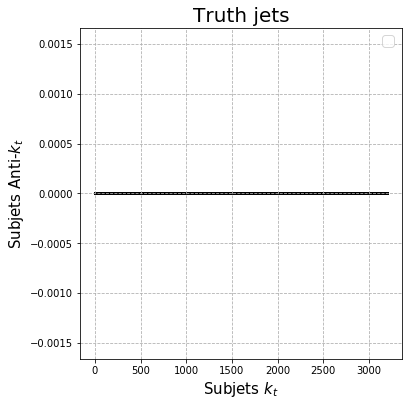

No handles with labels found to put in legend.


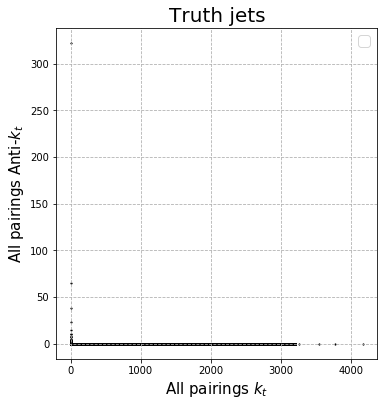

In [66]:
auxFunctions.dijLogLHscatter(
    variable=truth_dic["dijSubjets"],
    nameX="Subjets $k_t$",
    nameY="Subjets Anti-$k_t$",
    title="Truth jets",
    dijOnly=True)

auxFunctions.dijLogLHscatter(
    variable=truth_dic["dijs"],
    nameX="All pairings $k_t$",
    nameY="All pairings Anti-$k_t$",
    title="Truth jets",
    dijOnly=True)


In [67]:
# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijs"],
#     nameY = "$k_t$",
#     nameX ="Splitting log likelihood",
#     title = "",
#     kt = True,
#     jetdijs2 = BSO_dic["dijs"],
#     jetdijs3 = Greedy_dic["dijs"],
#     LabelJetdijs = "Truth",
#     LabelJetdijs2 = "BS",
#     LabelJetdijs3 = "Greedy",
#                     )


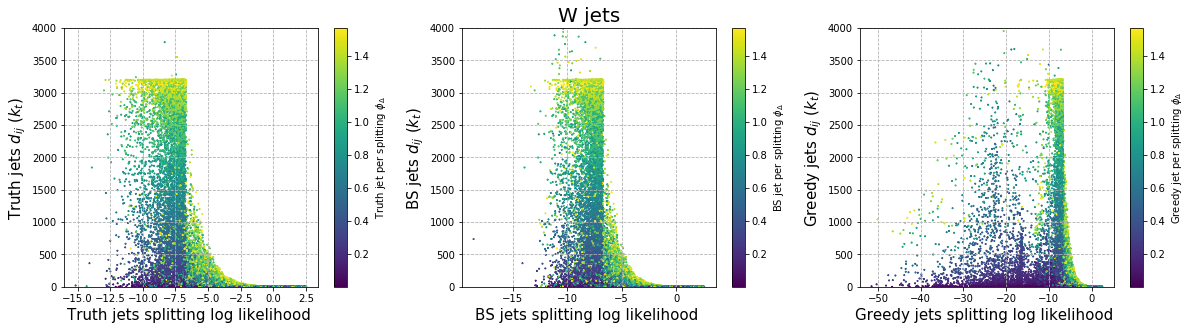

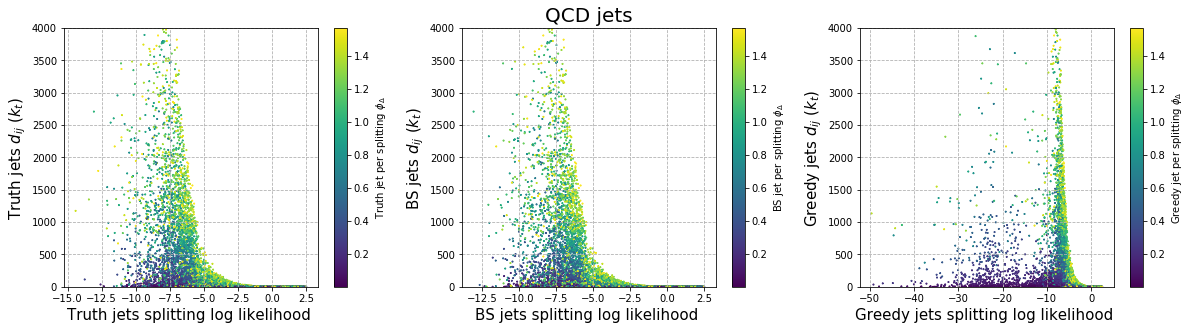

In [576]:
for i in range(len(jetLabels)):

    jetdijs = truth_dic[jetLabels[i]]["dijs"]
    nameY = "$d_{ij}$ ($k_t$)"
    nameX = "splitting log likelihood"
    title = ""
    jetdijs2 = BSO_dic[jetLabels[i]]["dijs"]
    jetdijs3 = Greedy_dic[jetLabels[i]]["dijs"]
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"

    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(16, 4)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    cl1 = ax1.scatter(jetdijs[0], jetdijs[3], c=truth_dic[jetLabels[i]]
                      ["JetsPhiDeltaRel"], marker="X", s=markersize)
    cl2 = ax2.scatter(jetdijs2[0], jetdijs2[3], c=BSO_dic[jetLabels[i]]
                      ["JetsPhiDeltaRel"],  marker="X", s=markersize)
    cl3 = ax3.scatter(jetdijs3[0], jetdijs3[3], c=Greedy_dic[jetLabels[i]]
                      ["JetsPhiDeltaRel"],  marker="X", s=markersize)

    fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
    fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
    fig2.colorbar(
        cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")

    # ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth jets %s " % nameX, fontsize=15)
    ax1.set_ylabel(r"Truth jets %s " % nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')
#     ax1.set_xlim([-30,8])
    ax1.set_ylim([0, 4000])

    # ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"BS jets %s " % nameX, fontsize=15)
    ax2.set_ylabel(r"BS jets %s " % nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')
#     ax2.set_xlim([-30,8])
    ax2.set_ylim([0, 4000])

    # ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"Greedy jets %s " % nameX, fontsize=15)
    ax3.set_ylabel(r"Greedy jets %s " % nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')
#     ax3.set_xlim([-30,8])
    ax3.set_ylim([0, 4000])

    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    ax2.set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize=20)

plt.show()


We show the jet splitting log lilkelihood vs the distance $d_{ij}$. The colormap indicates the angle $\phi_{\Delta}$ of the parent node splitting scale vector $\Delta$ with respect to the parent node momentum. Given that the splitting rule gives $p_{L/R} =\frac{1}{2} p_P \pm \Delta$ and $d_{ij}$ depends on the opening angle between $p_{L}$ and $p_{R}$, we map $\phi_{\Delta}$ to the range $[0,\pi/2]$.  The log likelihood looks to be independent of this angle as expected, and for a given log likelihood, greater $d_{ij}$ implies greater  $\phi_{\Delta}$ also as expected.

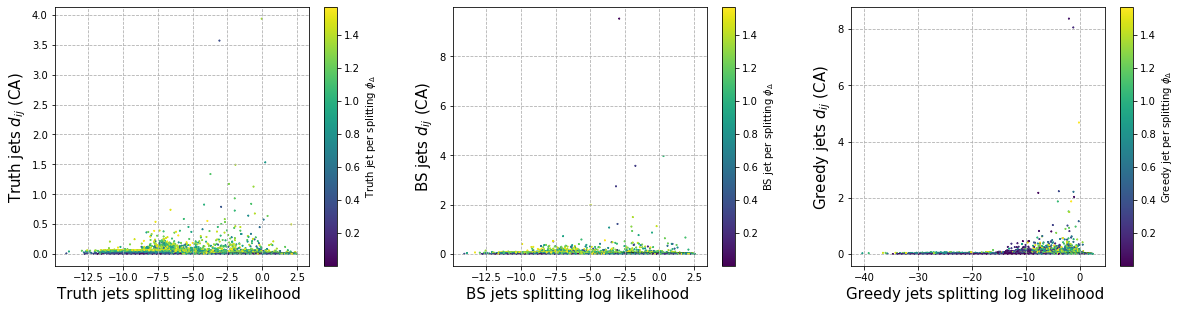

In [613]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$ (CA)"
nameX = "splitting log likelihood"
title = ""
jetdijs2 = BSO_dic["dijs"]
jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(16, 4)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

cl1 = ax1.scatter(jetdijs[0], jetdijs[2],
                  c=truth_dic["JetsPhiDeltaRel"], marker="X", s=markersize)
cl2 = ax2.scatter(jetdijs2[0], jetdijs2[2],
                  c=BSO_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)
cl3 = ax3.scatter(jetdijs3[0], jetdijs3[2],
                  c=Greedy_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)


fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")


# ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"Truth jets %s " % nameX, fontsize=15)
ax1.set_ylabel(r"Truth jets %s " % nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

# ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"BS jets %s " % nameX, fontsize=15)
ax2.set_ylabel(r"BS jets %s " % nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

# ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"Greedy jets %s " % nameX, fontsize=15)
ax3.set_ylabel(r"Greedy jets %s " % nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')


# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s" % title, fontsize=20)
plt.show()


In [69]:
# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijs"],
#     nameY = "Anti-$k_t$",
#     nameX ="Splitting log likelihood",
#     title = "",
#     antikt = True,
#     jetdijs2 = BSO_dic["dijs"],
#     jetdijs3 = Greedy_dic["dijs"],
#     LabelJetdijs = "Truth",
#     LabelJetdijs2 = "BS",
#     LabelJetdijs3 = "Greedy",
#                     )


### Tree Imbalance

In [577]:
importlib.reload(auxFunctions)


<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [578]:
weight = 0


In [579]:
for label in jetLabels:
    truth_dic[label] = auxFunctions.scanTreeImbalance(
        truth_dic[label], weight, startLevel=1)
    Greedy_dic[label] = auxFunctions.scanTreeImbalance(
        Greedy_dic[label], weight, startLevel=1)
    BSO_dic[label] = auxFunctions.scanTreeImbalance(
        BSO_dic[label], weight, startLevel=1)


Subjets imbalance

In [580]:
# stepSize = 500
# print(" Truth mean  =  %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(truth_dic["subjetsImb"]),  auxFunctions.getStd(truth_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))
# print(" Beam Search mean = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(BSO_dic["subjetsImb"]),  auxFunctions.getStd(BSO_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))
# print(" Greedy mean  = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(Greedy_dic["subjetsImb"]),  auxFunctions.getStd(Greedy_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))


In [581]:
stepSize = 500
for label in jetLabels:
    print(label)

    print(" Truth mean subjets imbalance =  %0.4f $\pm$ %0.4f" %
          (np.average(truth_dic[label]["subjetsImb"]),  auxFunctions.getStd(truth_dic[label]["subjetsImb"], stepSize)))
    print(" Beam Search mean subjets imbalance = %0.4f $\pm$ %0.4f" %
          (np.average(BSO_dic[label]["subjetsImb"]),  auxFunctions.getStd(BSO_dic[label]["subjetsImb"], stepSize)))
    print(" Greedy mean subjets imbalance  = %0.4f $\pm$ %0.4f" %
          (np.average(Greedy_dic[label]["subjetsImb"]),  auxFunctions.getStd(Greedy_dic[label]["subjetsImb"], stepSize)))
    print("---"*5)


Wjets
 Truth mean subjets imbalance =  0.3220 $\pm$ 0.0069
 Beam Search mean subjets imbalance = 0.3220 $\pm$ 0.0072
 Greedy mean subjets imbalance  = 0.2828 $\pm$ 0.0092
---------------
QCDjets
 Truth mean subjets imbalance =  0.3378 $\pm$ 0.0121
 Beam Search mean subjets imbalance = 0.3366 $\pm$ 0.0114
 Greedy mean subjets imbalance  = 0.3012 $\pm$ 0.0097
---------------


Tree imbalance

In [582]:
# stepSize = 500
# print(" Truth mean  =  %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(truth_dic["treesImb"]),  auxFunctions.getStd(truth_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))
# print(" Beam Search mean = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(BSO_dic["treesImb"]),  auxFunctions.getStd(BSO_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))
# print(" Greedy mean  = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(Greedy_dic["treesImb"]),  auxFunctions.getStd(Greedy_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))


In [583]:
stepSize = 500
for label in jetLabels:
    print(label)
    print(" Truth mean tree imbalance =  %0.4f $\pm$ %0.4f" %
          (np.average(truth_dic[label]["treesImb"]),  auxFunctions.getStd(truth_dic[label]["treesImb"], stepSize)))
    print(" Beam Search mean tree imbalance = %0.4f $\pm$ %0.4f" %
          (np.average(BSO_dic[label]["treesImb"]),  auxFunctions.getStd(BSO_dic[label]["treesImb"], stepSize)))
    print(" Greedy mean tree imbalance = %0.4f $\pm$ %0.4f" %
          (np.average(Greedy_dic[label]["treesImb"]),  auxFunctions.getStd(Greedy_dic[label]["treesImb"], stepSize)))
    print("---"*5)


Wjets
 Truth mean tree imbalance =  0.1910 $\pm$ 0.0025
 Beam Search mean tree imbalance = 0.1892 $\pm$ 0.0024
 Greedy mean tree imbalance = 0.1917 $\pm$ 0.0024
---------------
QCDjets
 Truth mean tree imbalance =  0.1909 $\pm$ 0.0020
 Beam Search mean tree imbalance = 0.1895 $\pm$ 0.0026
 Greedy mean tree imbalance = 0.1918 $\pm$ 0.0024
---------------


In [239]:
auxFunctions.subjetConst(testJet, testJet["root_id"])


0.7192982456140351

In [240]:
auxFunctions.treeBalance(testJet, testJet["root_id"], 0)


0.7458925412625452

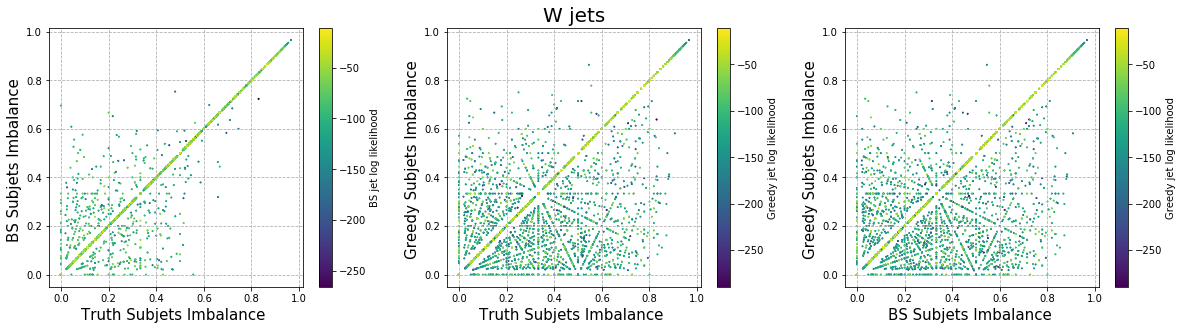

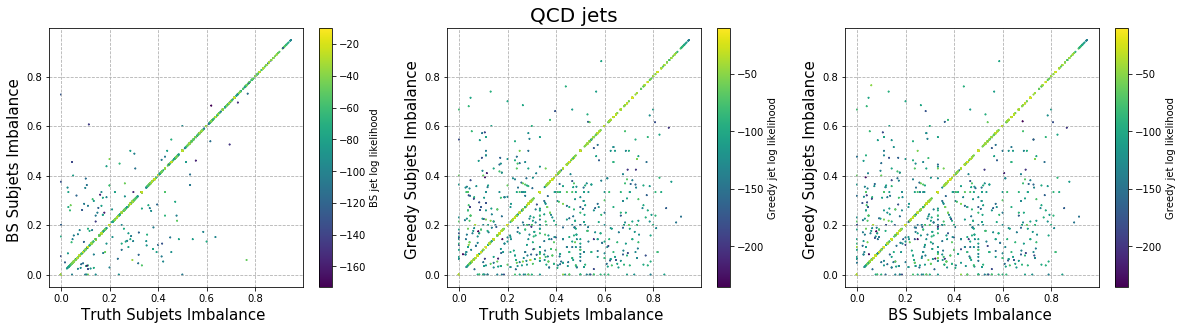

In [586]:
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
# Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
# BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

for i in range(len(jetLabels)):

    nameY = "Subjets Imbalance"
    nameX = "Subjets Imbalance"
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"

    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(16, 4)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    # cl1 = ax2.scatter(truth_dic["subjetsImb"], BSO_dic["subjetsImb"], c=BSO_dic["jetsListLogLH"],  marker="X", s=markersize, label=LabelJetdijs2)

    # cl2 = ax1.scatter(truth_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"],  marker="X", s=markersize, label=LabelJetdijs3)

    # cl3 = ax3.scatter(BSO_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs3)

    cl1 = ax1.scatter(truth_dic[jetLabels[i]]["subjetsImb"], BSO_dic[jetLabels[i]]
                      ["subjetsImb"], c=BSO_dic[jetLabels[i]]["jetsListLogLH"],  marker="X", s=markersize)

    cl2 = ax2.scatter(truth_dic[jetLabels[i]]["subjetsImb"], Greedy_dic[jetLabels[i]]
                      ["subjetsImb"],  c=Greedy_dic[jetLabels[i]]["jetsListLogLH"],  marker="X", s=markersize)

    cl3 = ax3.scatter(BSO_dic[jetLabels[i]]["subjetsImb"], Greedy_dic[jetLabels[i]]
                      ["subjetsImb"],  c=Greedy_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)

    fig2.colorbar(cl1, ax=ax1, label="BS jet log likelihood")
    fig2.colorbar(cl2, ax=ax2, label="Greedy jet log likelihood")
    fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")

    #     ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth %s " % nameX, fontsize=15)
    ax1.set_ylabel(r"BS %s " % nameX, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    #     ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"Truth %s " % nameX, fontsize=15)
    ax2.set_ylabel(r"Greedy %s " % nameX, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    #     ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"BS %s " % nameX, fontsize=15)
    ax3.set_ylabel(r"Greedy %s " % nameX, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')

    # plt.colorbar(ax=ax2)
    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    ax2.set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize=20)
plt.show()


We show the subjets imbalance defined as Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch. The colormap shows the jet log likeihood.
Also, BS jets approximate the truth jets better than the Greedy ones.

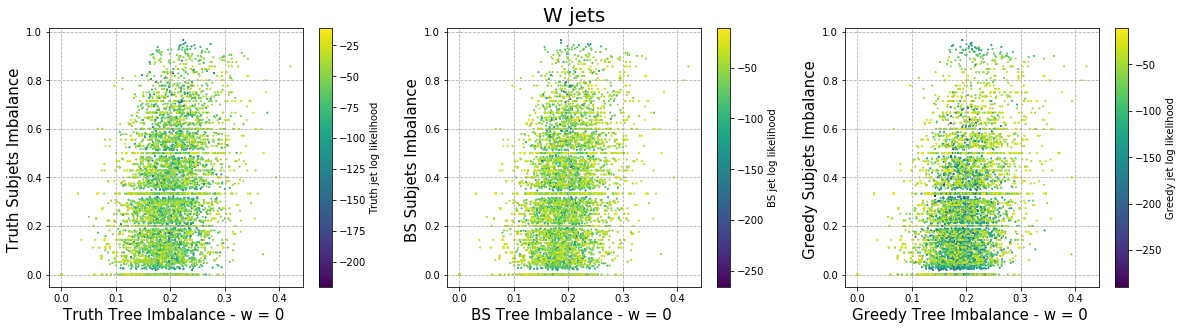

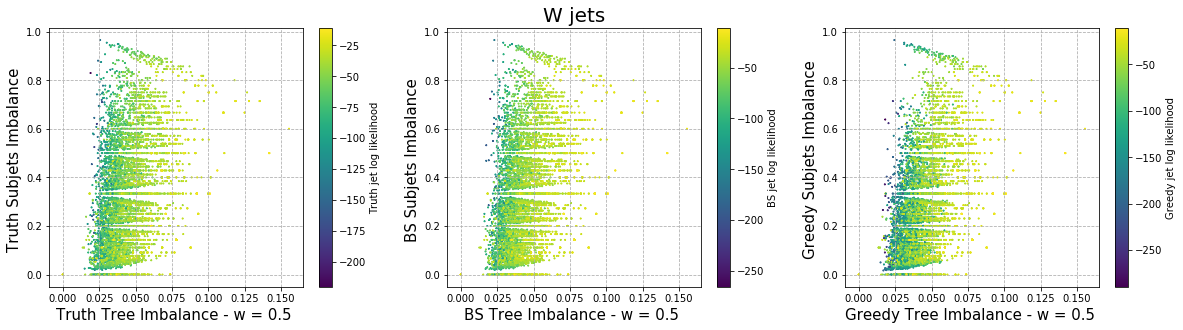

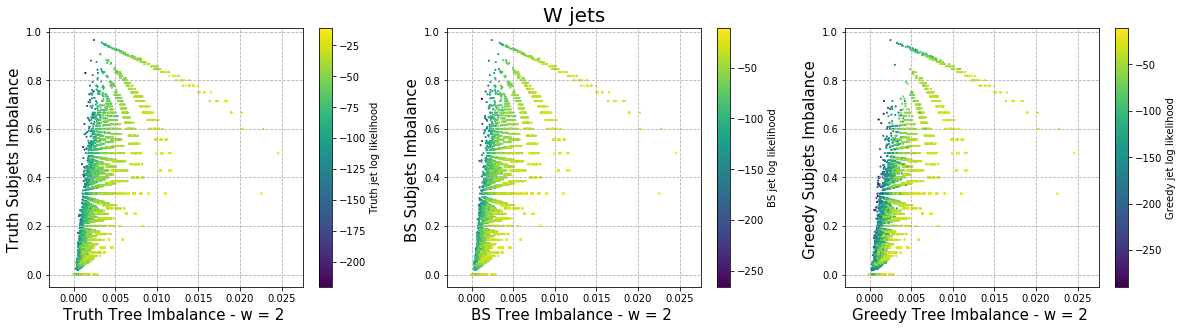

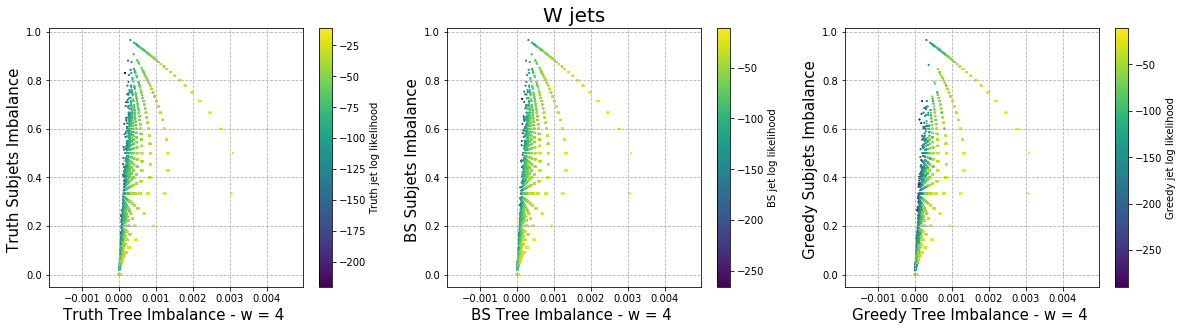

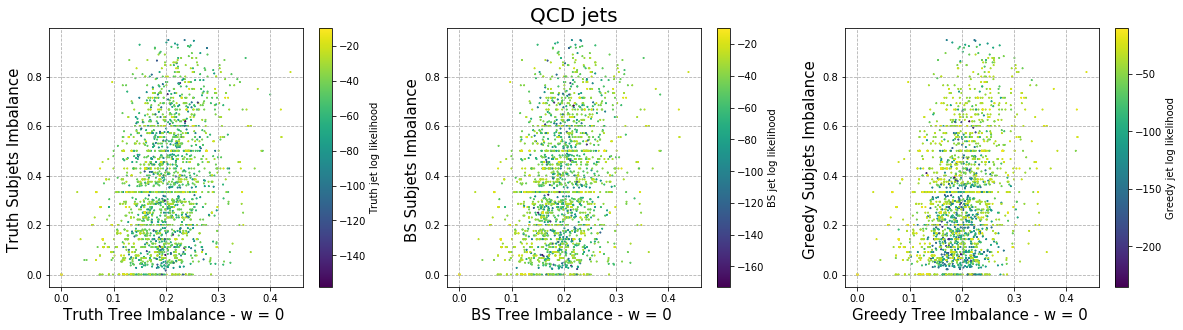

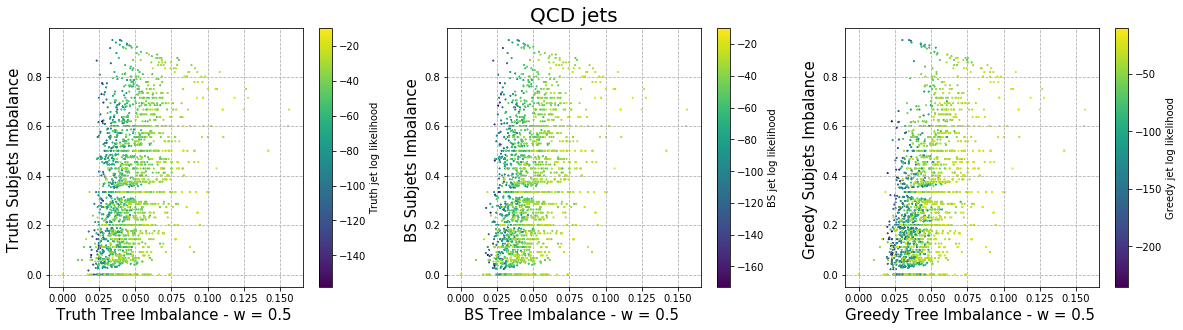

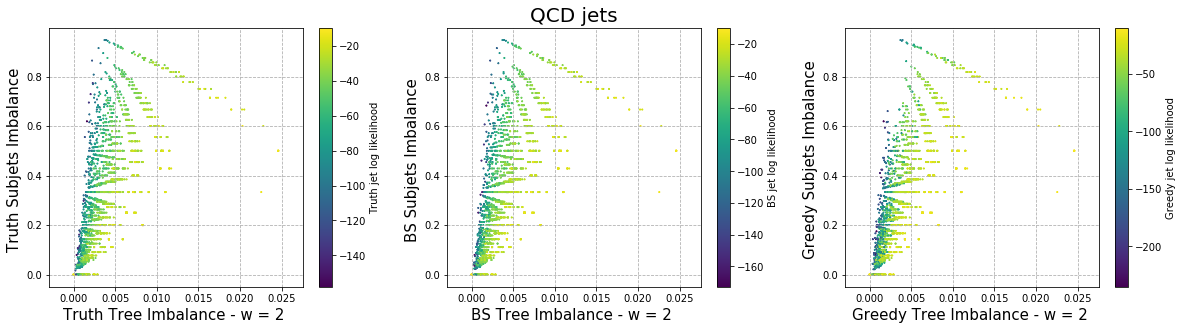

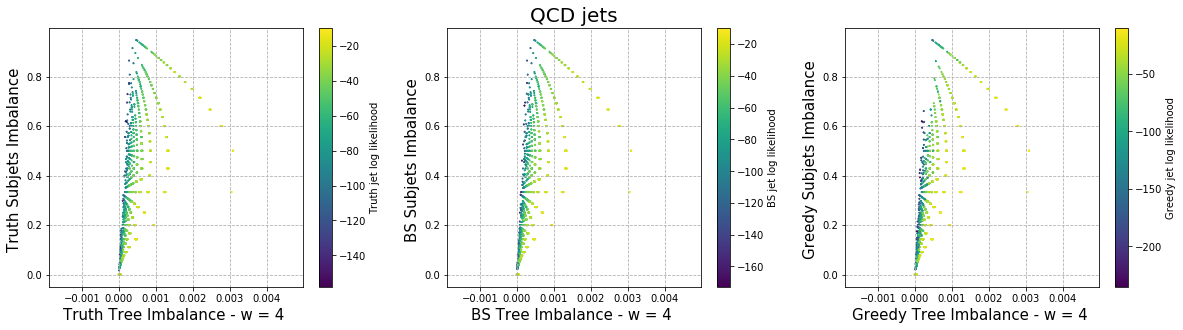

In [587]:

for i in range(len(jetLabels)):
    for weight in [0, 0.5, 2, 4]:
        truth_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            truth_dic[jetLabels[i]], weight, startLevel=1)
        Greedy_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            Greedy_dic[jetLabels[i]], weight, startLevel=1)
        BSO_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            BSO_dic[jetLabels[i]], weight, startLevel=1)

        nameX = "Tree Imbalance - w = %s" % str(weight)
        nameY = "Subjets Imbalance"
        title = ""
        LabelJetdijs = "Truth"
        LabelJetdijs2 = "BS"
        LabelJetdijs3 = "Greedy"

        fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
        fig2.set_size_inches(16, 4)

        plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
        markersize = 1

        cl1 = ax1.scatter(truth_dic[jetLabels[i]]["treesImb"], truth_dic[jetLabels[i]]
                          ["subjetsImb"], c=truth_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)
        cl2 = ax2.scatter(BSO_dic[jetLabels[i]]["treesImb"], BSO_dic[jetLabels[i]]
                          ["subjetsImb"], c=BSO_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)
        cl3 = ax3.scatter(Greedy_dic[jetLabels[i]]["treesImb"], Greedy_dic[jetLabels[i]]
                          ["subjetsImb"], c=Greedy_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)

        fig2.colorbar(cl1, ax=ax1, label="Truth jet log likelihood")
        fig2.colorbar(cl2, ax=ax2, label="BS jet log likelihood")
        fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")

    #     ax1.legend(loc="best",  fontsize=15)
        ax1.set_xlabel(r"Truth %s " % nameX, fontsize=15)
        ax1.set_ylabel(r"Truth %s " % nameY, fontsize=15)
        ax1.grid(which='both', axis='both', linestyle='--')

    #     ax2.legend(loc="best",  fontsize=15)
        ax2.set_xlabel(r"BS %s " % nameX, fontsize=15)
        ax2.set_ylabel(r"BS %s " % nameY, fontsize=15)
        ax2.grid(which='both', axis='both', linestyle='--')

    #     ax3.legend(loc="best",  fontsize=15)
        ax3.set_xlabel(r"Greedy %s " % nameX, fontsize=15)
        ax3.set_ylabel(r"Greedy %s " % nameY, fontsize=15)
        ax3.grid(which='both', axis='both', linestyle='--')

        # plt.legend(loc='best', fontsize=15)
        plt.grid(which='both', axis='both', linestyle='--')
        ax2.set_title(r""+jetLabels[i][0:-4]+" " +
                      jetLabels[i][-4::], fontsize=20)

    plt.show()


We show the tree vs subjets imbalance for different values of the weight $w$:
- We define the imbalance of the branches of a node splitting as  Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch.
- We define the tree imbalance as $\text{Tree}_{\text{Imb}} = 1/N_{\text{inner}} \sum_i $ Exp$(- w N_l)$ $\text{Imb}_i$, where $i$ labels the inner nodes, $N_{\text{inner}}$ is the number of inner nodes of the tree, $N_l$ is the level (starting at 1 for the root splitting) and $w$ is an input weight.

From the scan on $w$, we can see that the greater the log likelihood of a jet, the more important is the contribution of the subjets to the tree imbalance.
Also, BS jets approximate the truth jets better than the Greedy ones.

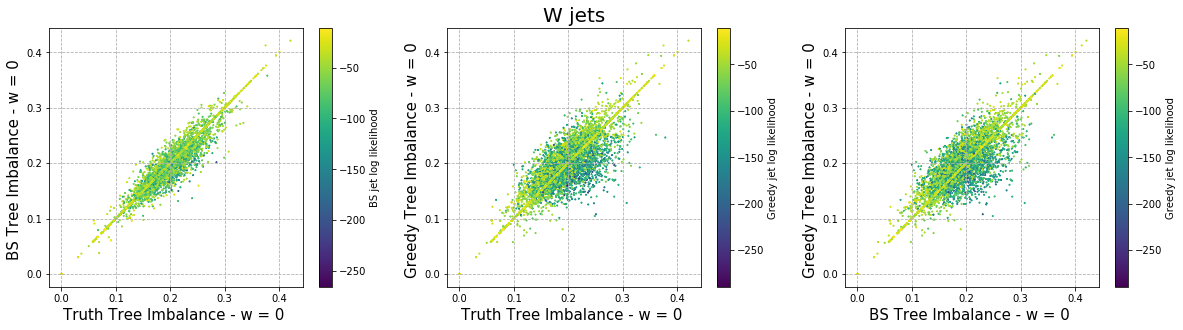

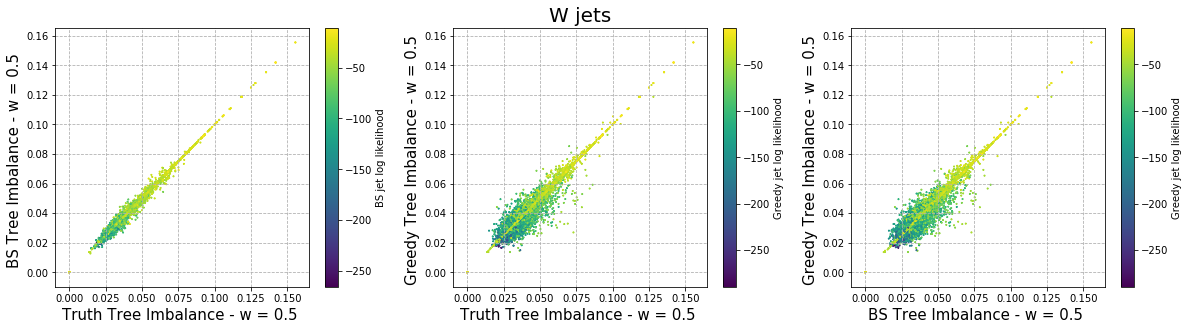

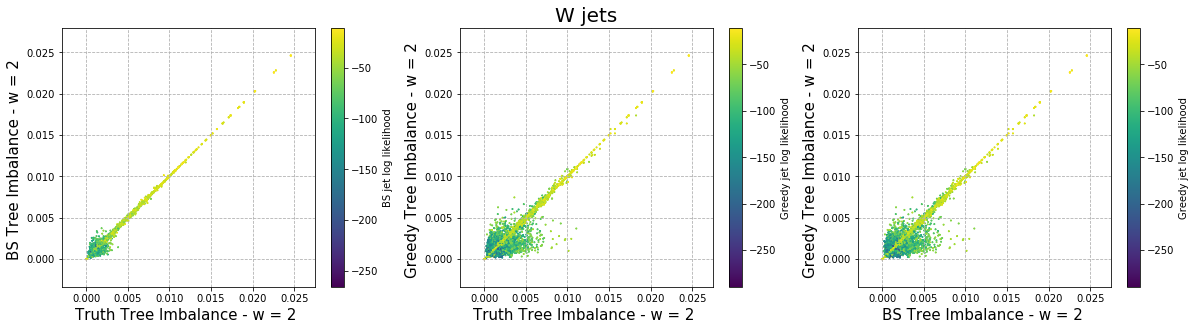

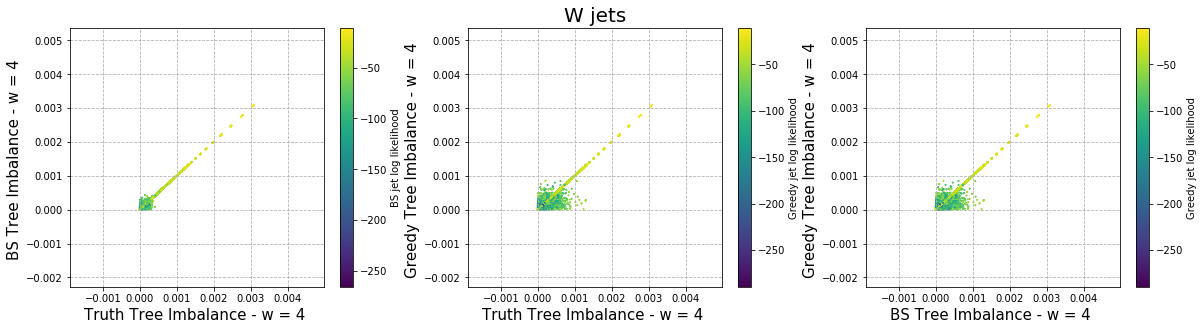

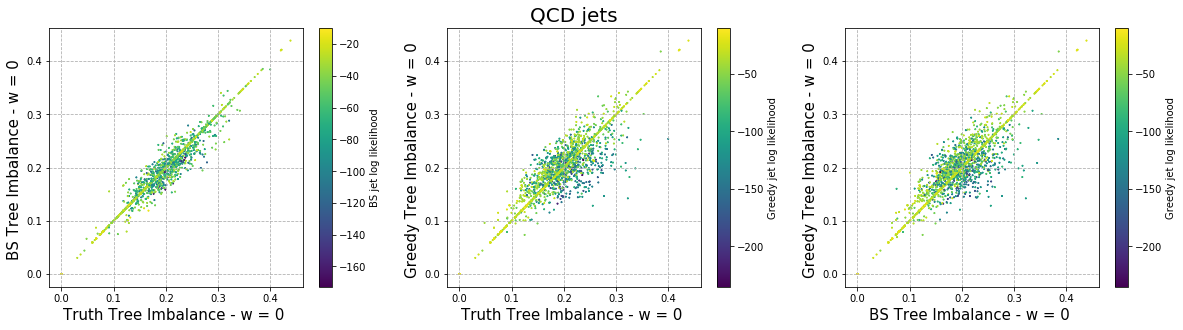

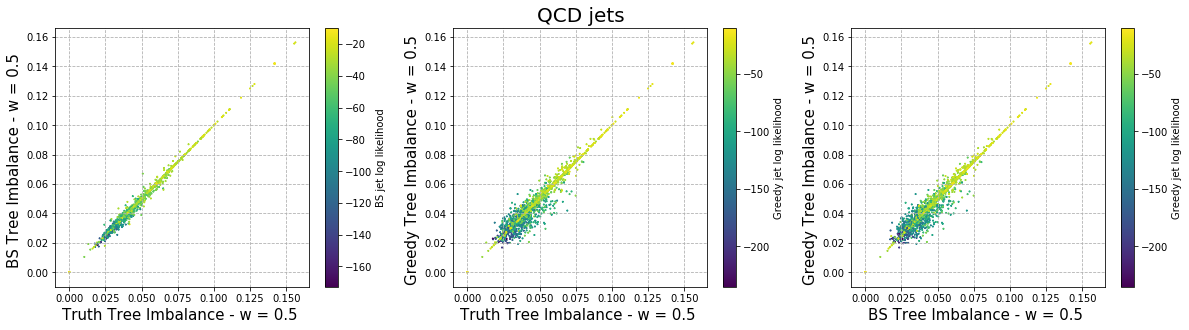

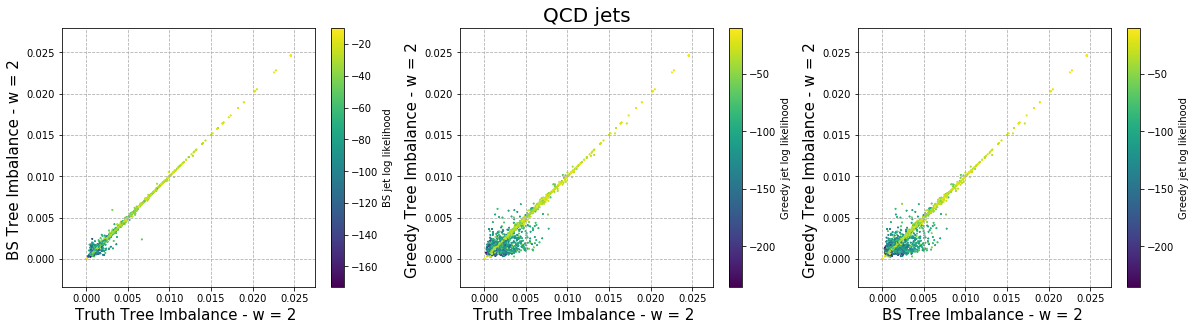

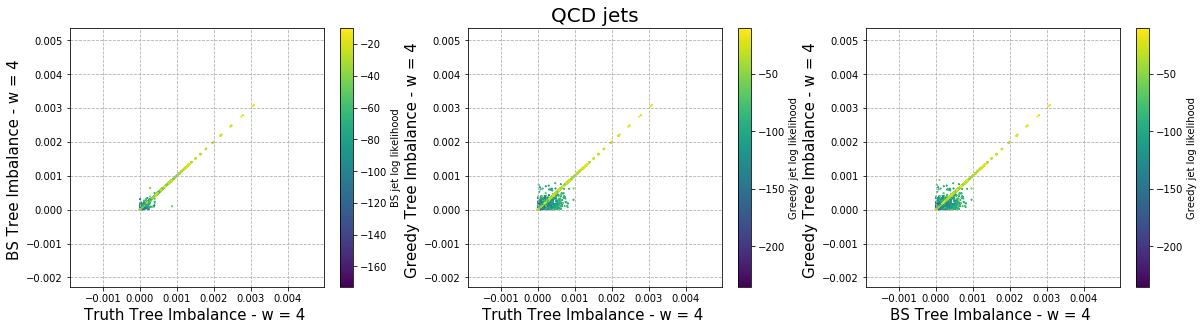

In [590]:

for i in range(len(jetLabels)):
    for weight in [0, 0.5, 2, 4]:
        # for weight in [0]:

        truth_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            truth_dic[jetLabels[i]], weight, startLevel=1)
        Greedy_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            Greedy_dic[jetLabels[i]], weight, startLevel=1)
        BSO_dic[jetLabels[i]] = auxFunctions.scanTreeImbalance(
            BSO_dic[jetLabels[i]], weight, startLevel=1)

        nameY = "Subjets Imbalance"
        nameX = "Tree Imbalance - w = %s" % str(weight)
        title = ""
        LabelJetdijs = "Truth"
        LabelJetdijs2 = "BS"
        LabelJetdijs3 = "Greedy"

        fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
        fig2.set_size_inches(16, 4)

        plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
        markersize = 1

    #     cl2 = ax2.scatter(truth_dic["treesImb"], BSO_dic["treesImb"], c = BSO_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs2)

    #     cl1  = ax1.scatter(truth_dic["treesImb"], Greedy_dic["treesImb"], c = Greedy_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs3)

    #     cl3 = ax3.scatter(BSO_dic["treesImb"], Greedy_dic["treesImb"], c =Greedy_dic["jetsListLogLH"] , marker="X", s=markersize, label=LabelJetdijs3)
        cl1 = ax1.scatter(truth_dic[jetLabels[i]]["treesImb"], BSO_dic[jetLabels[i]]
                          ["treesImb"], c=BSO_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)

        cl2 = ax2.scatter(truth_dic[jetLabels[i]]["treesImb"], Greedy_dic[jetLabels[i]]
                          ["treesImb"], c=Greedy_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)

        cl3 = ax3.scatter(BSO_dic[jetLabels[i]]["treesImb"], Greedy_dic[jetLabels[i]]
                          ["treesImb"], c=Greedy_dic[jetLabels[i]]["jetsListLogLH"], marker="X", s=markersize)

        fig2.colorbar(cl1, ax=ax1, label="BS jet log likelihood")
        fig2.colorbar(cl2, ax=ax2, label="Greedy jet log likelihood")
        fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")

    #     ax1.legend(loc="best",  fontsize=15)
        ax1.set_xlabel(r"Truth %s " % nameX, fontsize=15)
        ax1.set_ylabel(r"BS %s " % nameX, fontsize=15)
        ax1.grid(which='both', axis='both', linestyle='--')

    #     ax2.legend(loc="best",  fontsize=15)
        ax2.set_xlabel(r"Truth %s " % nameX, fontsize=15)
        ax2.set_ylabel(r"Greedy %s " % nameX, fontsize=15)
        ax2.grid(which='both', axis='both', linestyle='--')

    #     ax3.legend(loc="best",  fontsize=15)
        ax3.set_xlabel(r"BS %s " % nameX, fontsize=15)
        ax3.set_ylabel(r"Greedy %s " % nameX, fontsize=15)
        ax3.grid(which='both', axis='both', linestyle='--')

        # plt.legend(loc='best', fontsize=15)
        plt.grid(which='both', axis='both', linestyle='--')
        ax2.set_title(r""+jetLabels[i][0:-4]+" " +
                      jetLabels[i][-4::], fontsize=20)
    plt.show()


We show the tree vs subjets imbalance for different values of the weight $w$:
- We define the imbalance of the branches of a node splitting as  Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch.
- We define the tree imbalance as $\text{Tree}_{\text{Imb}} = 1/N_{\text{inner}} \sum_i $ Exp$(- w N_l)$ $\text{Imb}_i$, where $i$ labels the inner nodes, $N_{\text{inner}}$ is the number of inner nodes of the tree, $N_l$ is the level (starting at 1 for the root splitting) and $w$ is an input weight.

From the scan on $w$, we can see that the greater the log likelihood of a jet, the more important is the contribution of the subjets to the tree imbalance.
Also, BS jets approximate the truth jets better than the Greedy ones.

### Subjets Imbalance vs logLH

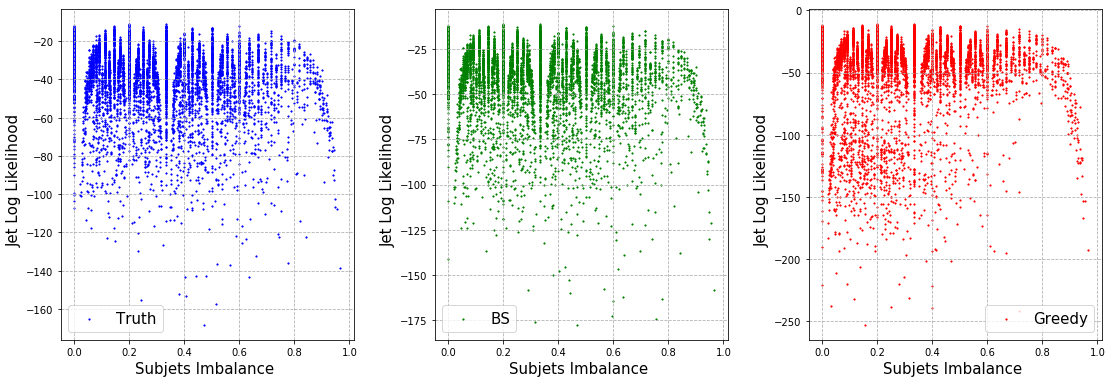

In [316]:
nameY = "Jet Log Likelihood "
nameX = "Subjets Imbalance"
title = ""
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(15, 5)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

ax1.scatter(truth_dic["subjetsImb"], truth_dic["jetsListLogLH"],
            color="blue", marker="X", s=markersize, label=LabelJetdijs)
ax2.scatter(BSO_dic["subjetsImb"], BSO_dic["jetsListLogLH"],
            color="green", marker="X", s=markersize, label=LabelJetdijs2)
ax3.scatter(Greedy_dic["subjetsImb"], Greedy_dic["jetsListLogLH"],
            color="red", marker="X", s=markersize, label=LabelJetdijs3)

ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"%s " % nameX, fontsize=15)
ax1.set_ylabel(r"%s " % nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"%s " % nameX, fontsize=15)
ax2.set_ylabel(r"%s " % nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"%s " % nameX, fontsize=15)
ax3.set_ylabel(r"%s " % nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')


# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s" % title, fontsize=20)

plt.show()


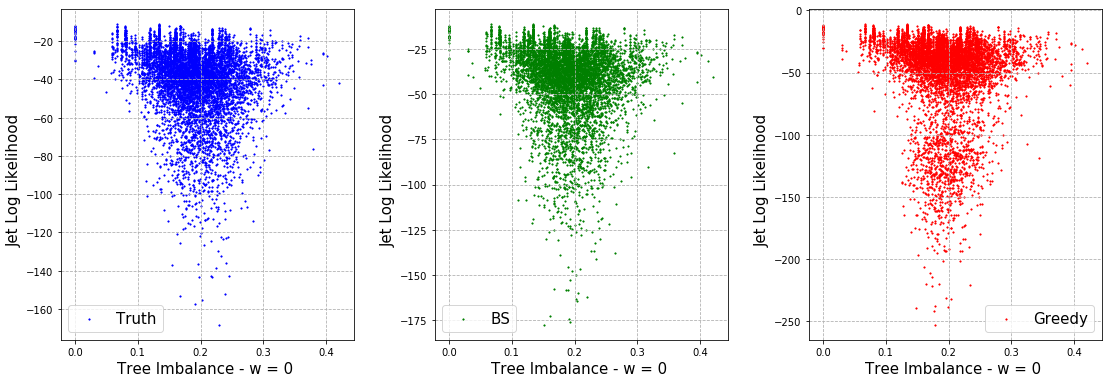

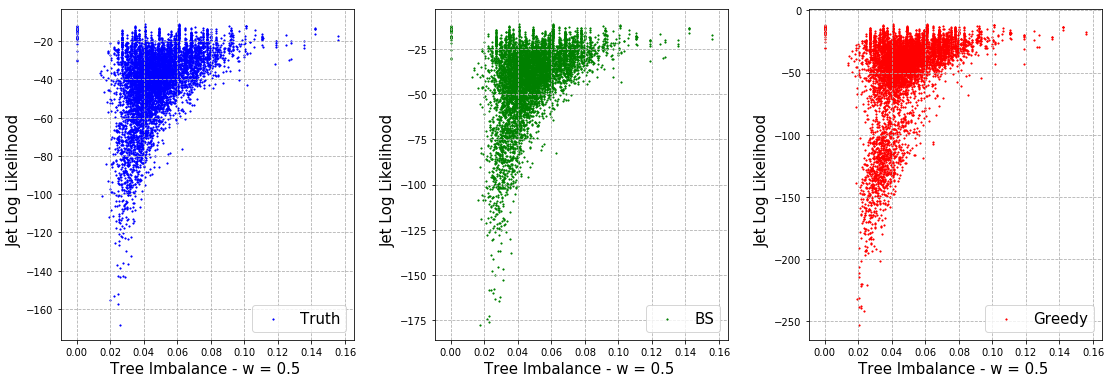

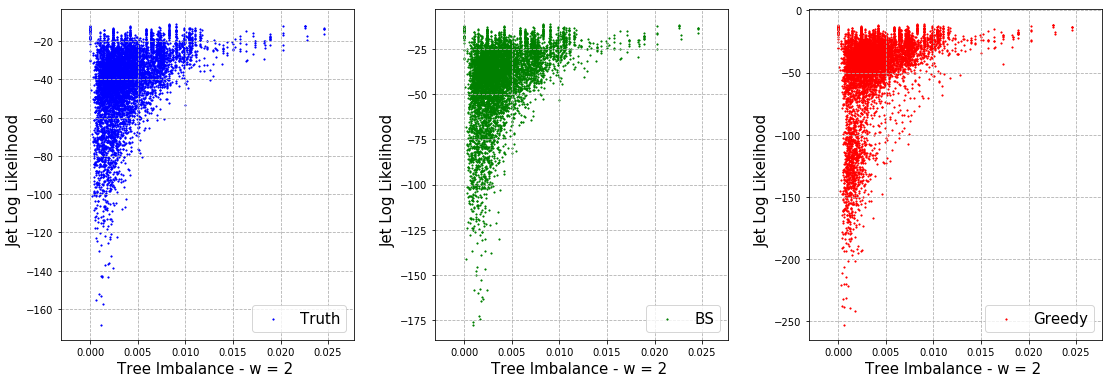

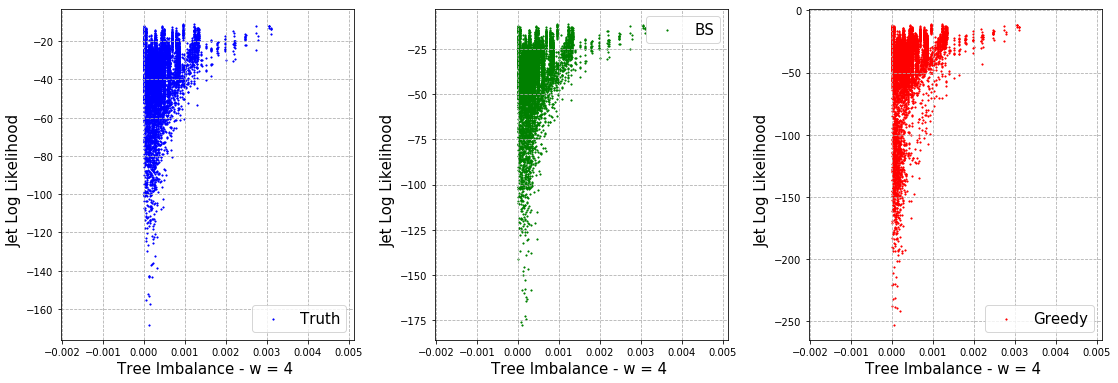

In [393]:
for weight in [0, 0.5, 2, 4]:
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel=1)
    Greedy_dic = auxFunctions.scanTreeImbalance(
        Greedy_dic, weight, startLevel=1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel=1)

    nameY = "Jet Log Likelihood "
    nameX = "Tree Imbalance - w = %s" % str(weight)
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"

    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(15, 5)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    ax1.scatter(truth_dic["treesImb"], truth_dic["jetsListLogLH"],
                color="blue", marker="X", s=markersize, label=LabelJetdijs)
    ax2.scatter(BSO_dic["treesImb"], BSO_dic["jetsListLogLH"],
                color="green", marker="X", s=markersize, label=LabelJetdijs2)
    ax3.scatter(Greedy_dic["treesImb"], Greedy_dic["jetsListLogLH"],
                color="red", marker="X", s=markersize, label=LabelJetdijs3)

    ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"%s " % nameX, fontsize=15)
    ax1.set_ylabel(r"%s " % nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"%s " % nameX, fontsize=15)
    ax2.set_ylabel(r"%s " % nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"%s " % nameX, fontsize=15)
    ax3.set_ylabel(r"%s " % nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')

    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s" % title, fontsize=20)

plt.show()


# Beam Search implementations: Beam Size Comparisons

In [164]:
importlib.reload(bs)
importlib.reload(BSO)


<module 'scripts.beamSearchOptimal' from '/home/sm4511/TreeAlgorithms/scripts/beamSearchOptimal.py'>

In [165]:
def truthLogLH(truth_jet, k=0):
    """ Truth jet log likelihood """

    likelihood.enrich_jet_logLH(truth_jet)

    LogLH = np.sum(truth_jet["logLH"])

    return LogLH


In [106]:
def reclustGreedyJet(truth_jet):
    """ Greedy jet reclustering """

    greedyJet = N2Greedy.recluster(
        truth_jet,
        delta_min=truth_jet["pt_cut"],
        lam=float(truth_jet["Lambda"]),
        visualize=False,
    )

    GreedyLogLH = sum(greedyJet["logLH"])

    return greedyJet, GreedyLogLH


In [107]:
def beamSize_BSOList(truth_jet, beamsizeList, Nbest=1):
    """ Beam size scan for the Optimal Beam Search algorithm"""

    BSOtimeList = []
    BSO_jets = []

    for i in beamsizeList:

        startTime = time.time()

        BSO_jets.append(
            BSO.recluster(
                truth_jet,
                beamSize=i,
                delta_min=truth_jet["pt_cut"],
                lam=float(truth_jet["Lambda"]),
                N_best=Nbest,
            )[0]
        )

        BSOtimeList.append(time.time() - startTime)

    BSO_jetsLogLH = [sum(jet["logLH"]) for jet in BSO_jets]

    return BSOtimeList, BSO_jets, BSO_jetsLogLH


### Beam size scan and plotting  functions

In [109]:
def BeamSizeLogLH(jetsName,  filename="", k=0):

    with open(input_dir + str(jetsName) + '.pkl', "rb") as fd:
        truth_jet = pickle.load(fd, encoding='latin-1')[int(k)]

    truthConst = N2Greedy.getConstituents(
        truth_jet,
        truth_jet["root_id"],
        [],
    )

    N = len(truthConst)

    likelihood.enrich_jet_logLH(truth_jet)

    truthLogLH = np.sum(truth_jet["logLH"])

    greedyJet, GreedyLogLH = reclustGreedyJet(truth_jet)

    beamsizeList = np.minimum(np.concatenate(([1], np.arange(
        0.5, 5.5, 0.5)*N)), np.asarray(N*(N-1)/2 * np.ones(11))).astype(int)
#     beamsizeList = np.array(([1]))

    BSOtimeList, BSO_jets, BSO_jetsLogLH = beamSize_BSOList(
        truth_jet, beamsizeList)

    bstimeList, bs_jets, bs_jetsLogLH = beamSize_BSList(
        truth_jet, beamsizeList)

    with open("data/beamScanJets/jets"+str(filename)+".pkl", "wb") as f:
        pickle.dump((
            truth_jet,
            truthLogLH,
            greedyJet,
            GreedyLogLH,
            BSOtimeList,
            BSO_jets,
            BSO_jetsLogLH,
            bstimeList,
            bs_jets,
            bs_jetsLogLH
        ), f)

    return beamsizeList


In [110]:
def plotBeamSizeLogLH(beamsizeList=None, filename=""):

    with open("data/beamScanJets/jets"+str(filename)+".pkl", "rb") as fd:
        truth_jet,\
            truthLogLH, \
            greedyJet,\
            GreedyLogLH,\
            BSOtimeList,\
            BSO_jets,\
            BSO_jetsLogLH, \
            bstimeList, \
            bs_jets,\
            bs_jetsLogLH = pickle.load(fd, encoding='latin-1')

    N = BSO_jets[0]["Nconst"]
    beamsizeList = np.minimum(np.concatenate(([1], np.arange(
        0.5, 5.5, 0.5)*N)), np.asarray(N*(N-1)/2 * np.ones(11))).astype(int)

    truthConst = N2Greedy.getConstituents(
        truth_jet,
        truth_jet["root_id"],
        [],
    )

    N = len(truthConst)

    print("Number of leaves = ", N)

    fig2, (ax1) = plt.subplots(nrows=1, ncols=1)
    fig2.set_size_inches(16, 8)
    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 100
    ax1.scatter(beamsizeList/N, BSO_jetsLogLH, color='blue',
                marker="s", s=markersize, label="bs Optimal")
    ax1.scatter(beamsizeList/N, bs_jetsLogLH, color="red",
                marker="o", s=markersize, label="bs")
    ax1.scatter(1/N, GreedyLogLH, color="Green",
                marker="X", s=markersize, label="Greedy")
    ax1.scatter(1/N, truthLogLH, color="black",
                marker="d", s=markersize, label="Truth")
    ax1.grid(which='both', axis='both', linestyle='--')
    ax1.set_xlabel(r"(Beam Size)/(# leaves)", fontsize=15)
    ax1.set_ylabel("Jet log likelihood", fontsize=15)
    plt.title('Beam Size search', fontsize=25)
    plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')


### Log likelihoood vs beam size plots 

In [114]:
"""Data dir"""
input_dir = 'data/old/'
jets = "tree_100_truth"

with open(input_dir + str(jets) + '.pkl', "rb") as fd:
    truth_jets = pickle.load(fd, encoding='latin-1')


In [115]:
"""Number of jet constituents"""
Nconst100 = []
for jet in truth_jets:
    Nconst100.append(len(jet["leaves"]))

NconstAvg100 = np.average(Nconst100)
display(NconstAvg100)


36.82

In [117]:
""" Find jet location in list for a specific number of leaves"""
for i, N in enumerate(Nconst100):
    if 12 > N > 9:
        print("Jet #", i, "N const = ", N)


Jet # 72 N const =  11


In [118]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_72", k=72)
print("Total time = ", time.time() - startTime)


Total time =  2.057978868484497


Number of leaves =  11


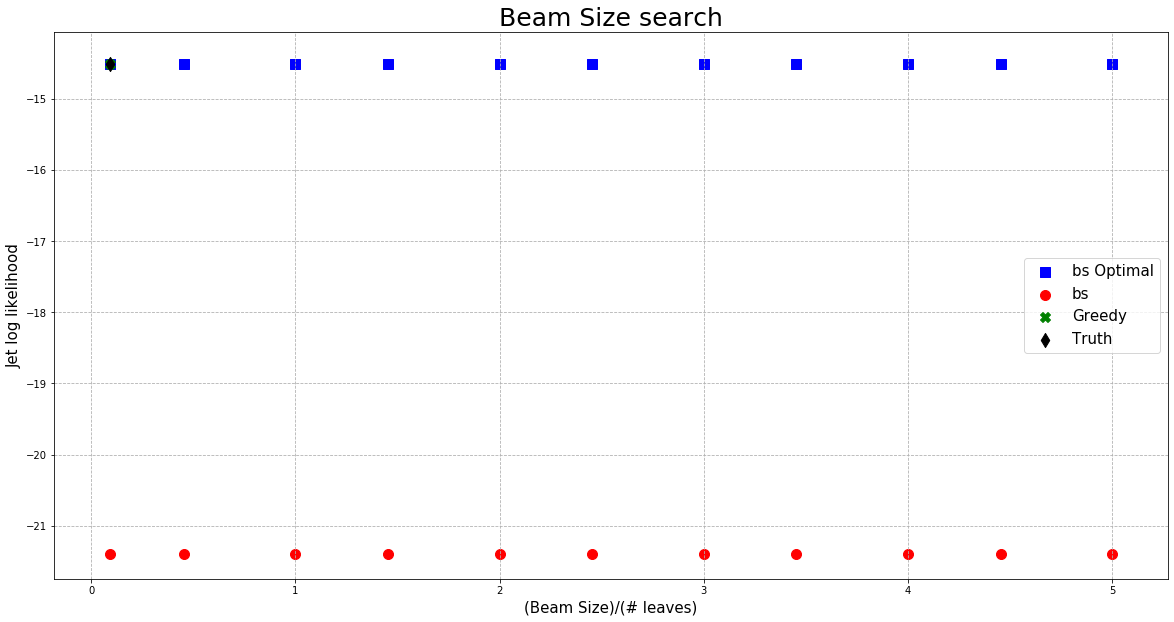

In [119]:
plotBeamSizeLogLH(filename="100_72")


In [120]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_34", k=34)
print("Total time = ", time.time() - startTime)


Total time =  20.85628390312195


Number of leaves =  22


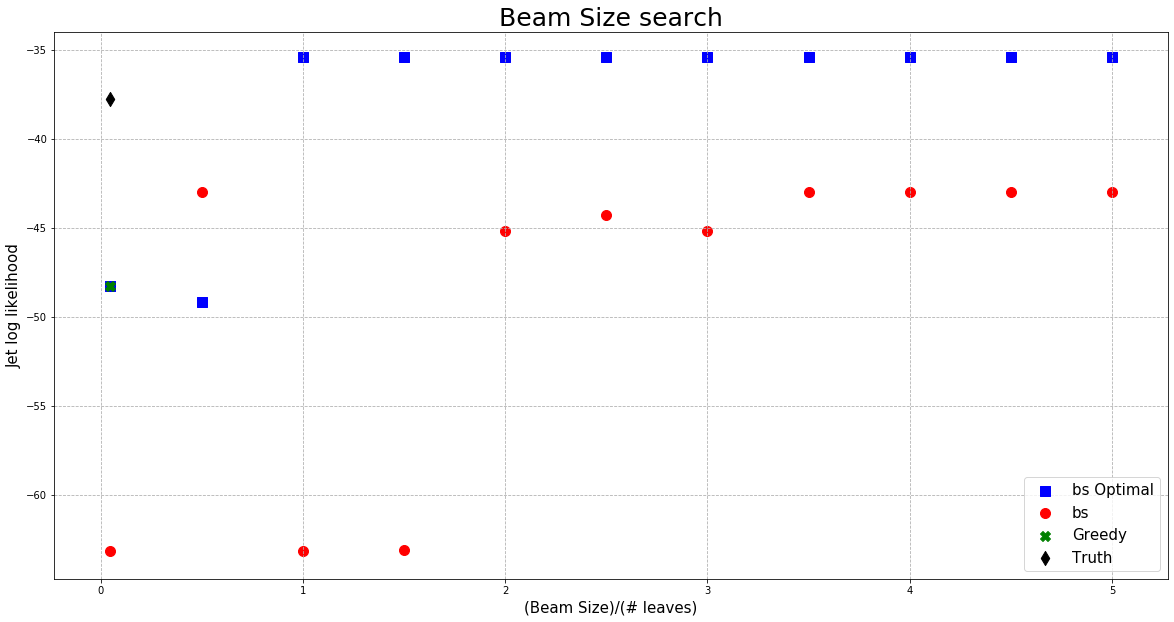

In [121]:
plotBeamSizeLogLH(filename="100_34")


In [122]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_70", k=70)
print("Total time = ", time.time() - startTime)


Total time =  346.0549330711365


Number of leaves =  50


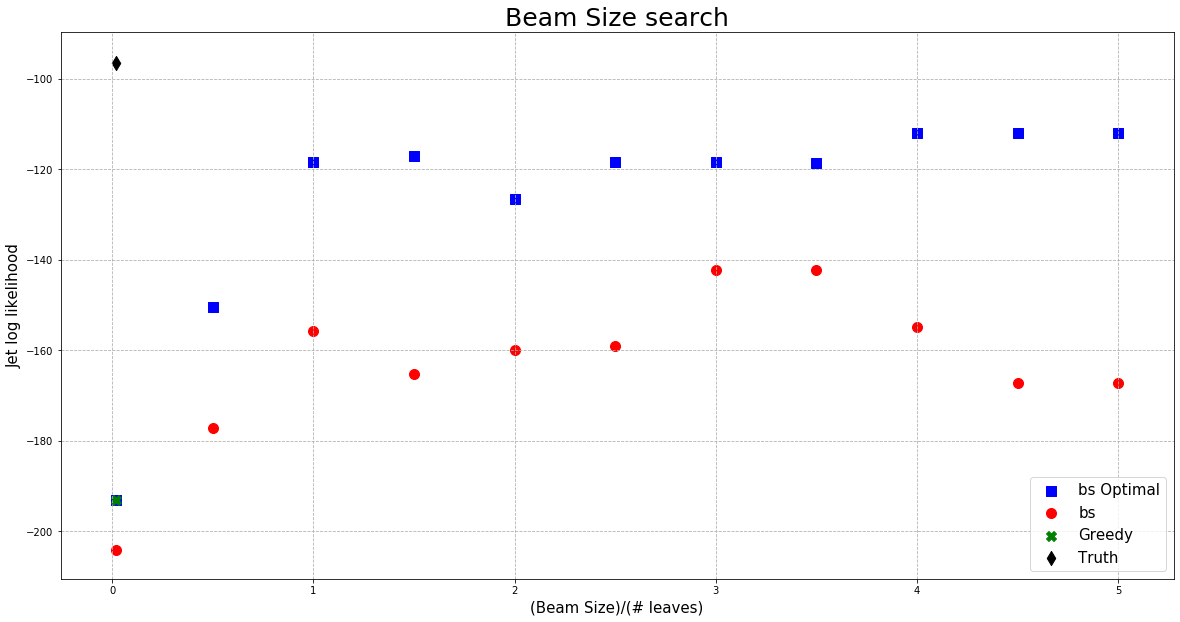

In [123]:
plotBeamSizeLogLH(filename="100_70")


In [124]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_62", k=62)
print("Total time = ", time.time() - startTime)


Total time =  4663.079787015915


Number of leaves =  98


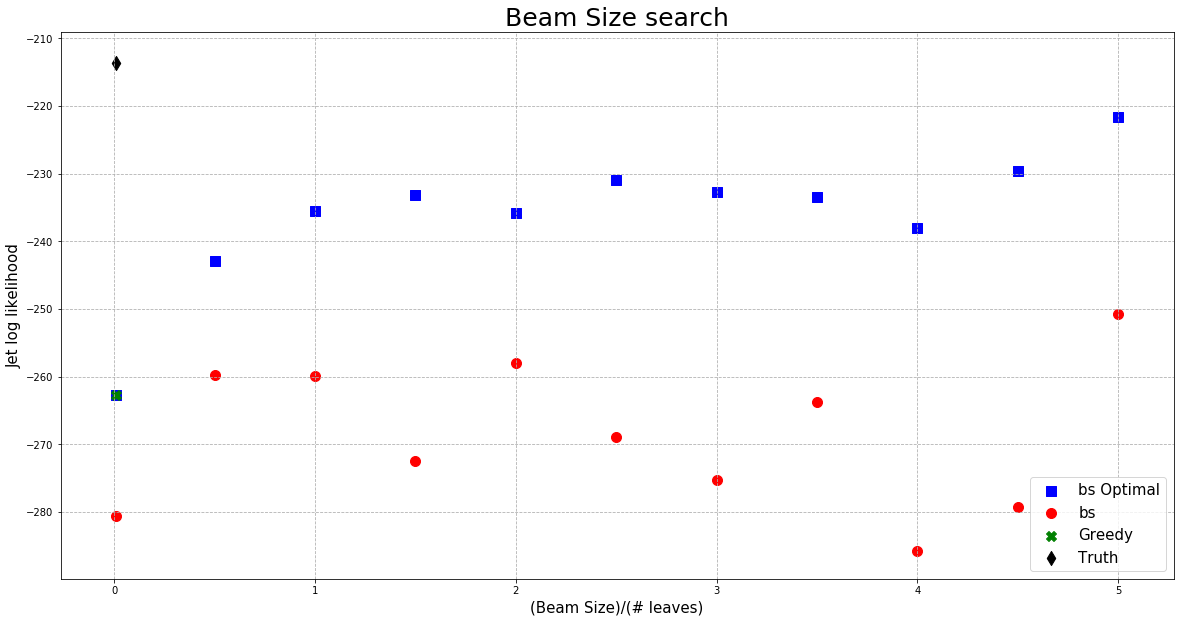

In [125]:
plotBeamSizeLogLH(filename="100_62")


## TESTS AND CODE COMPARISONS

In [151]:
def getLastSplittingProb(inputJet, node_id):
    """
    Recursive function to get a list of the tree leaves
    """
    jet = copy.deepcopy(inputJet)

    probList = []

    left_node_id = jet["tree"][node_id, 0]
    right_node_id = jet["tree"][node_id, 1]

    if jet["tree"][left_node_id, 0] == -1 and jet["tree"][right_node_id, 0] == -1:

        probList.append(jet["logLH"][node_id - 97])

#     elif jet["tree"][node_id, 0] == -1:

# 		continue

    elif jet["tree"][node_id, 0] != -1:
        getLastSplittingProb(
            jet,
            jet["tree"][node_id, 0],
        )

        getLastSplittingProb(
            jet,
            jet["tree"][node_id, 1],
        )

    return probList


In [152]:
BSO_jetLastSplittingProb = getLastSplittingProb(
    BSO_jets[0], BSO_jets[0]["root_id"])


In [154]:
BSO_jetLastSplittingProb


[]

In [153]:
sum(BSO_jetLastSplittingProb)


0

In [32]:
# BSO_jets[0]


In [147]:
len(BSO_jets[0]["logLH"])


97

In [148]:
97+98


195

In [115]:
# BSO_jet


In [243]:
test = bs.recluster(
    truth_jet,
    beamSize=10,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    N_best=1,
)[-1]


In [244]:
test = BSO.recluster(
    truth_jet,
    beamSize=10,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    N_best=1,
)[-1]


## Duccio's beam search

In [116]:
importlib.reload(beamsearchTJS)


<module 'scripts.beamsearchTJS' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/beamsearchTJS.py'>

In [93]:
len(truthConst)


30

In [97]:
truthConst = N2Greedy.getConstituents(
    truth_jet,
    truth_jet["root_id"],
    [],
)


In [98]:
truthConstTriple = np.concatenate(
    (truthConst, np.array([[0.]]*len(truthConst))), axis=1)


In [127]:
beam_Size = 20


In [128]:
a = time.time()
djet_bs_beam1 = beamsearchTJS.build_beamsearch_tree_TJS(
    truthConstTriple, 1, truth_jet["pt_cut"], float(truth_jet["Lambda"]))
b = time.time()
display(b-a)


0.1830611228942871

In [129]:
a = time.time()
djet_bs = beamsearchTJS.build_beamsearch_tree_TJS(
    truthConstTriple, beam_Size, truth_jet["pt_cut"], float(truth_jet["Lambda"]))
b = time.time()
display(b-a)


34.568865060806274

In [130]:
a = time.time()
beamSearch_jets = bs.recluster(
    truth_jet,
    beamSize=beam_Size,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    N_best=1,
)
b = time.time()
display(b-a)


10.727005958557129

In [131]:
np.sum(djet_bs["logLH"])


-74.47946266489937

In [132]:
np.sum(beamSearch_jets[-1]["logLH"])


-74.47946197240074

In [133]:
34.57/10.72


3.2248134328358207

In [126]:
8.48/2.48


3.4193548387096775